# Исследование продаж компьютерных игр


**Автор:**  

Григорьев Павел


**Описание проекта:**   

Интернет-магазин 'Стримчик' разрабатывает стратегию на 2017 год для повышения продаж компьютерных игр, основываясь на анализе исторических данных о продажах, оценках пользователей и экспертов, жанрах и платформах. Анализ позволит выявить закономерности, которые помогут определить потенциально популярные продукты и эффективно спланировать рекламные кампании.

**Цель:**  

Определить ключевые факторы, влияющие на успешность продаж компьютерных игр, установить взаимосвязи между ними и объемами продаж,   
а также проанализировать изменения этих показателей в зависимости от платформ, регионов продвижения и исторического периода.

**Источники данных:**  

Исторические данные из открытых источников о продажах игр, включая оценки пользователей и экспертов, а также информацию о жанрах и платформах.

**Главные выводы:**  
тут помещаем самое главное из общего вывода, примерно до полустраницы, чтобы не было сильно много и при этом указать все главные выводы
Будет идеально, елси выводы на похожие темы будут рядом, то есть елси мы имеем несколько выводов о доходе, то лушче поместить их рядом

- Женщины чаще возвращают кредит, чем мужчины.
- Долги присутствуют у людей с разным доходом.


**Аномалии и особенности в данных:**

- В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.
- В столбце с количеством детей есть отрицательные значения. 47 штук. Меньше 1 процента от всего датафрейма. Также есть клиенты с 20 детьми.


**Рекомендации:**

- Добавить контроль данных, чтобы не дублировались значения с разными регистрами в колонке с образованием.
- Добавить уникальный идентификатор клиента, чтобы избежать дублирования строк.


## Загрузка библиотек <skip>

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import plotly.express as px
import pagri_data_tools  # type: ignore
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

## Описание и изучение данных


### Описание данных


- Name - название игры
- Platform - платформа
- Year_of_Release - год выпуска
- Genre - жанр игры
- NA_sales - продажи в Северной Америке (миллионы проданных копий)
- EU_sales - продажи в Европе (миллионы проданных копий)
- JP_sales - продажи в Японии (миллионы проданных копий)
- Other_sales - продажи в других странах (миллионы проданных копий)
- Critic_Score - оценка критиков (максимум 100)
- User_Score - оценка пользователей (максимум 10)
- Rating - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Изучение данных


#### Изучение переменных


Загружаем данные и задаем типы данных для столбцов, где это возможно.

In [2]:
dtype = {'Platform': 'category', 'Genre': 'category', 'Rating': 'category'}
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', dtype=dtype)
df.sample(5, random_state=7)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
12182,FIFA Soccer 06,GBA,"2,005.00",Sports,0.05,0.02,0.00,0.00,NaN,tbd,E
7100,Buzz! Junior: RoboJam,PS2,"2,007.00",Misc,0.11,0.09,0.00,0.03,NaN,NaN,NaN
16385,Kamaitachi no Yoru 2: Tokubetsu Hen,PSP,"2,006.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
12356,Tonka Rescue Patrol,GC,"2,003.00",Action,0.05,0.01,0.00,0.00,NaN,NaN,NaN


Приведем названия колонок к нижнему регистру.


In [3]:
df.columns = [col.lower() for col in df.columns]

Столбец с оценками пользователей имеет тип object. Это странно. Изучим для начала этот столбец.

Values,10 014 (60%),,tbd (24%)
Missing,6 701 (40%),,7.8 (3%)
Distinct,96 (1%),,8 (3%)
Duplicated origin,16 618 (99.4%),,8.2 (3%)
Dupl (modify - origin),---,,8.3 (3%)
Empty,---,,8.5 (3%)
RAM (Mb),1,,7.5 (3%)

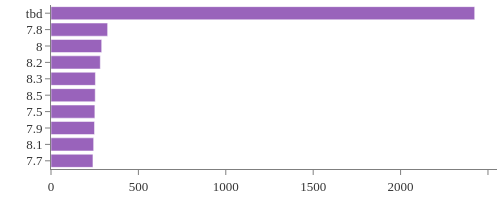

In [4]:
gen = pagri_data_tools.info_gen(df, column='user_score', mode='column')
gen.next()

**Наблюдения:**  

- Есть странное значение tbd, которое не является числом. И таких значений 24 %.

tbd означает "to be determined" - "будет определено позже"  
Так как нам нужен этот столбец в числовом виде, то заменим tbd на na. И зменим тип данных на числовой.

In [5]:
df.user_score.isna().sum()

np.int64(6701)

In [6]:
(df.user_score == 'tbd').sum()

np.int64(2424)

In [7]:
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'])

In [8]:
df.user_score.isna().sum()

np.int64(9125)

In [9]:
(df.user_score == 'tbd').sum()

np.int64(0)

Изучим каждый столбец отдельно.

In [10]:
gen = pagri_data_tools.info_gen(df)
gen.next()

Rows,Features,RAM (Mb),Duplicates,Dupl (sub - origin)
16 715,11,2,---,---


Values,16 446 (98%),,Max,2 016,,Avg,2 006.48,,2 008 (9%)
Missing,269 (2%),,95%,2 015,,Mode,2 008,,2 009 (9%)
Distinct,37 (<1%),,75%,2 010,,Range,36,,2 010 (8%)
Duplicates,16 677 (99.8%),,Median,2 007,,iQR,7,,2 007 (7%)
Zeros,---,,25%,2 003,,std,5.88,,2 011 (7%)
Negative,---,,5%,1 996,,kurt,1.77,,2 006 (6%)
RAM (Mb),<1 Mb,,Min,1 980,,skew,-0.97,,2 005 (6%)

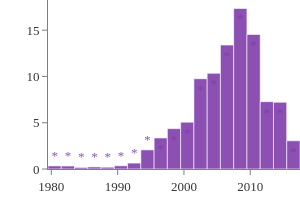

In [11]:
gen.next()

**Наблюдения:**  

- Игры имеют год выпуска от 1980 до 2016 года.
- Основная часть игр имеет год выпуска от 2003 до 2010 года.
- Больше всего игр 2008 года.
- В столбце с годом выпуска 2 % пропусков.

Values,16 715 (100%),,Max,41.36,,Avg,0.26,,0 (27%)
Missing,---,,95%,1.06,,Mode,0,,0.02 (3%)
Distinct,402 (2%),,75%,0.24,,Range,41.36,,0.03 (3%)
Duplicates,16 313 (98%),,Median,0.08,,iQR,0.24,,0.04 (3%)
Zeros,4 508 (27%),,25%,0,,std,0.81,,0.01 (3%)
Negative,---,,5%,0,,kurt,648.57,,0.05 (3%)
RAM (Mb),<1 Mb,,Min,0,,skew,18.77,,0.06 (3%)

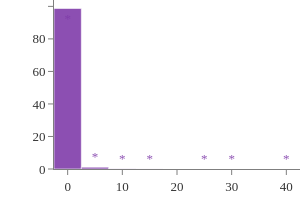
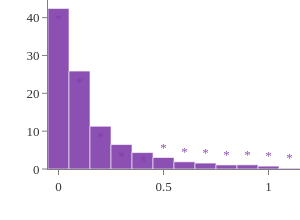

In [12]:
gen.next('dual')

**Наблюдения:**  

- В столбце с продажами в Северной Америке есть нули (27%). По видимому для этих игр не было продаж в Северной Америке.
- Количество проданных игр в Северной Америке лежит в диапазоне от 0 до 41.36 млн.
- В основном количество проданных игр в Северной Америке находится в диапазоне от 0 до 0.24 млн.

Values,16 715 (100%),,Max,28.96,,Avg,0.15,,0 (35%)
Missing,---,,95%,0.62,,Mode,0,,0.01 (9%)
Distinct,307 (2%),,75%,0.11,,Range,28.96,,0.02 (8%)
Duplicates,16 408 (98%),,Median,0.02,,iQR,0.11,,0.03 (6%)
Zeros,5 870 (35%),,25%,0,,std,0.5,,0.04 (4%)
Negative,---,,5%,0,,kurt,755.52,,0.05 (3%)
RAM (Mb),<1 Mb,,Min,0,,skew,18.85,,0.06 (2%)

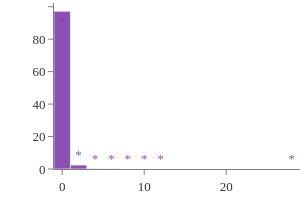
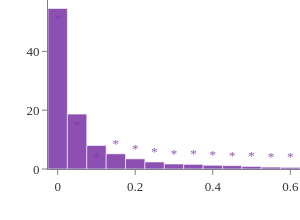

In [13]:
gen.next('dual')

**Наблюдения:**  

- В столбце с продажами в Европе есть нули (35%). По видимому для этих игр не было продаж в Европе.
- Количество проданных игр в Европе лежит в диапазоне от 0 до 28.96 млн.
- В основном количество проданных игр в Европе находится в диапазоне от 0 до 0.11 млн.

Values,16 715 (100%),,Max,10.22,,Avg,0.08,,0 (63%)
Missing,---,,95%,0.36,,Mode,0,,0.02 (4%)
Distinct,244 (1%),,75%,0.04,,Range,10.22,,0.01 (4%)
Duplicates,16 471 (99%),,Median,0,,iQR,0.04,,0.03 (3%)
Zeros,10 514 (63%),,25%,0,,std,0.31,,0.04 (2%)
Negative,---,,5%,0,,kurt,194.27,,0.05 (2%)
RAM (Mb),<1 Mb,,Min,0,,skew,11.21,,0.06 (2%)

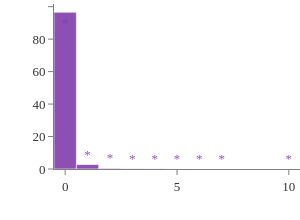
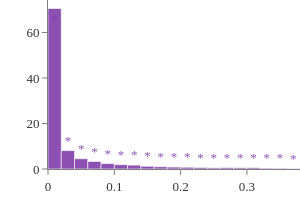

In [14]:
gen.next('dual')

**Наблюдения:**  

- В столбце с продажами в Японии есть нули (63%). По видимому для этих игр не было продаж в Японии.
- Количество проданных игр в Японии лежит в диапазоне от 0 до 10.22 млн.
- В основном количество проданных игр в Японии находится в диапазоне от 0 до 0.4 млн.

Values,16 715 (100%),,Max,10.57,,Avg,0.05,,0 (39%)
Missing,---,,95%,0.2,,Mode,0,,0.01 (21%)
Distinct,155 (1%),,75%,0.03,,Range,10.57,,0.02 (10%)
Duplicates,16 560 (99.1%),,Median,0.01,,iQR,0.03,,0.03 (6%)
Zeros,6 601 (39%),,25%,0,,std,0.19,,0.04 (4%)
Negative,---,,5%,0,,kurt,1054.90,,0.05 (3%)
RAM (Mb),<1 Mb,,Min,0,,skew,24.58,,0.06 (2%)

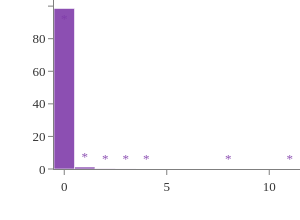
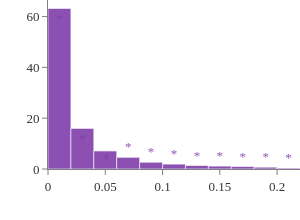

In [15]:
gen.next('dual')

**Наблюдения:**  

- В столбце с продажами в других странах есть нули (39%). По видимому для этих игр не было продаж в других странах.
- Количество проданных игр в других странах лежит в диапазоне от 0 до 10.57 млн.
- В основном количество проданных игр в других странах находится в диапазоне от 0 до 0.03 млн.

Values,8 137 (49%),,Max,98,,Avg,68.97,,70 (3%)
Missing,8 578 (51%),,95%,89,,Mode,70,,71 (3%)
Distinct,82 (<1%),,75%,79,,Range,85,,75 (3%)
Duplicates,16 632 (99.5%),,Median,71,,iQR,19,,78 (3%)
Zeros,---,,25%,60,,std,13.94,,73 (3%)
Negative,---,,5%,43,,kurt,0.14,,80 (3%)
RAM (Mb),<1 Mb,,Min,13,,skew,-0.61,,76 (3%)

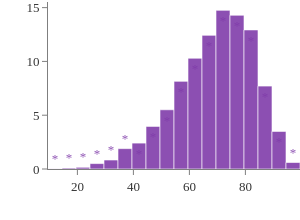

In [16]:
gen.next()

**Наблюдения:**  

- В столбце с оценкой критиков 51% пропущенных занчений.
- Оценка критиков лежит в диапазоне от 13 до 98.
- В основном критики ставят оценки от 60 до 79.

Values,7 590 (45%),,Max,9.7,,Avg,7.13,,7.8 (4%)
Missing,9 125 (55%),,95%,8.9,,Mode,7.8,,8 (4%)
Distinct,95 (1%),,75%,8.2,,Range,9.7,,8.2 (4%)
Duplicates,16 619 (99.4%),,Median,7.5,,iQR,1.8,,8.3 (3%)
Zeros,1 (<1%),,25%,6.4,,std,1.5,,8.5 (3%)
Negative,---,,5%,4.1,,kurt,1.72,,7.5 (3%)
RAM (Mb),<1 Mb,,Min,0,,skew,-1.25,,7.9 (3%)

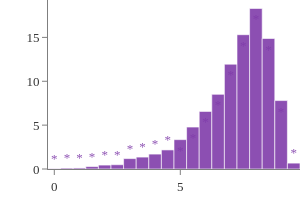

In [17]:
gen.next()

**Наблюдения:**  

- В столбце с оценкой пользователей 55% пропущенных значений.
- Оценка пользователей варируется от 0 до 9.7.
- В освновном пользователи ставят оценки от 6.4 до 8.2
- Значение 0 в оценке пользователей явно является аномалией.

Values,16 713 (99.9%),,Need for Speed: Most Wanted <1%
Missing,2 (<1%),,Ratatouille <1%
Distinct,11 559 (69%),,LEGO Marvel Super Heroes <1%
Duplicated origin,5 155 (31%),,FIFA 14 <1%
Dupl (modify - origin),2 (<1%),,Madden NFL 07 <1%
Empty,---,,LEGO The Hobbit <1%
RAM (Mb),1,,FIFA Soccer 13 <1%

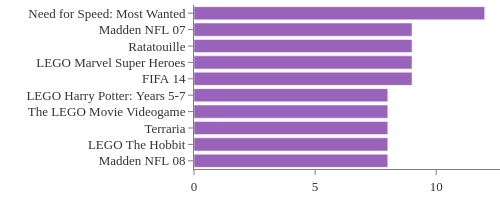

In [18]:
gen.next()

**Наблюдения:**  

- В столбце с названием игры есть 2 пропущенных значения (менее 1%)
- Топ 5 самых встречающихся игр: Need for Speed: Most Wanted, Ratatouille, LEGO Marvel Super Heroes, FIFA 14, Madden NFL 07

Values,16 715 (100%),,PS2 (13%)
Missing,---,,DS (13%)
Distinct,31 (<1%),,PS3 (8%)
Duplicated origin,16 684 (99.8%),,Wii (8%)
Dupl (modify - origin),---,,X360 (8%)
Empty,---,,PSP (7%)
RAM (Mb),<1 Mb,,PS (7%)

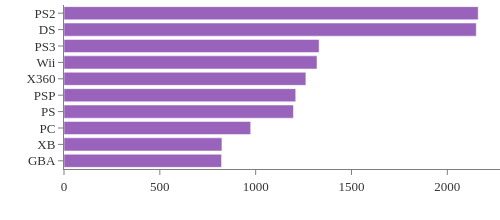

In [19]:
gen.next()

**Наблюдения:**  

- Больше всего игр на платформах PS2 и DS (по 13% от общего числа игр).

Values,16 713 (99.9%),,Action (20%)
Missing,2 (<1%),,Sports (14%)
Distinct,12 (<1%),,Misc (10%)
Duplicated origin,16 702 (99.9%),,Role-Playing (9%)
Dupl (modify - origin),---,,Shooter (8%)
Empty,---,,Adventure (8%)
RAM (Mb),<1 Mb,,Racing (7%)

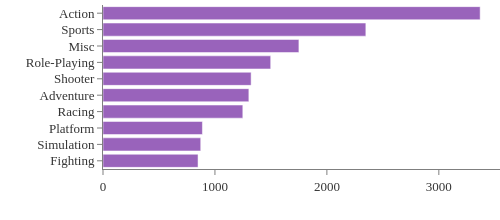

In [20]:
gen.next()

У нас отображаются не все значения жанров, посмотрим на полный список.

In [21]:
pagri_data_tools.value_counts_table(df, 'genre', chunk_size = 6, tables_in_row = 2)

Action,3 369 (20.16%),|,Racing,1 249 (7.47%)
Sports,2 348 (14.05%),|,Platform,888 (5.31%)
Misc,1 750 (10.47%),|,Simulation,873 (5.22%)
Role-Playing,1 498 (8.96%),|,Fighting,849 (5.08%)
Shooter,1 323 (7.92%),|,Strategy,683 (4.09%)
Adventure,1 303 (7.8%),|,Puzzle,580 (3.47%)


**Наблюдения:**  

- В столбце с жанром игры 2% пропусков.  
- Больше всего игр в жанре Action.

Values,9 949 (60%),,E (40%)
Missing,6 766 (40%),,T (30%)
Distinct,8 (<1%),,M (16%)
Duplicated origin,16 706 (99.9%),,E10+ (14%)
Dupl (modify - origin),---,,EC <1%
Empty,---,,K-A <1%
RAM (Mb),<1 Mb,,RP <1%

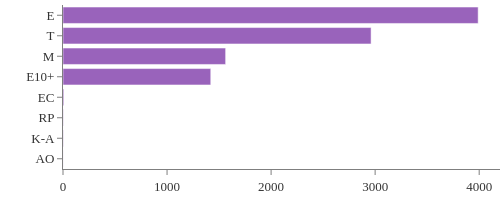

In [22]:
gen.next()

**Наблюдения:**  

- В рейтинге 40% пропусков.
- Больше всего игр с рейтингами E (40%) и T(30%).

#### Изучение дубликатов


Посмотрим на дубли во всем датафрейме


In [23]:
pagri_data_tools.check_duplicated(df)

'no duplicates'

В датафрейме полных строк дубликатов нет.

Посмотрим сколько у нас дублей в каждой колонке


In [24]:
series_duplicated = pagri_data_tools.find_columns_with_duplicates(df)

name,5155 (30.84%)
platform,16684 (99.81%)
year_of_release,16677 (99.77%)
genre,16702 (99.92%)
na_sales,16313 (97.59%)
eu_sales,16408 (98.16%)
jp_sales,16471 (98.54%)
other_sales,16560 (99.07%)
critic_score,16632 (99.50%)
user_score,16619 (99.43%)
rating,16706 (99.95%)


У нас нет столбцов, в которых значения долны быть уникльыми. Поэтом все впорядке.

Посмотрим на дубли в комбинации колонок с названием игры, жанром и платформой.

In [25]:
gen = pagri_data_tools.check_duplicated_combinations_gen(df[['name', 'platform', 'genre']], n=3)

In [26]:
next(gen)

Group by 2 columns


,name,platform,genre
name,,,
platform,5 < 1%,,
genre,5 151 (30.8%),16 421 (98.2%),


**Наблюдения:**  

- В паре платформа и название игры всего 5 дубликатов.
- В парах жанр/название игры и жанр/платформа много дубликатов.

Посмотрим на строки с дублями в названии игры и платформе

In [27]:
df[df[['name', 'platform']].duplicated(keep=False)].sort_values(by=['name', 'platform'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.50,E
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.50,T
11715,Need for Speed: Most Wanted,PC,"2,012.00",Racing,0.00,0.06,0.00,0.02,82.00,8.50,T
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.50,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.50,T
1745,Sonic the Hedgehog,PS3,"2,006.00",Platform,0.41,0.06,0.04,0.66,43.00,4.10,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.10,E10+
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Посмотрим на пропуски по 3 колонки вместе

In [28]:
next(gen)

Group by 3 columns


name | platform | genre,5


Посмотрим на дубликаты одновременно в названии игры, жанре и платформе

In [29]:
pagri_data_tools.check_duplicated(df[['name', 'platform', 'genre']])

Duplicated is 5 (0.0%) rows


count
name                        platform genre          
NaN                         GEN      NaN           2
sonic the hedgehog          PS3      Platform      2
madden nfl 13               PS3      Sports        2
need for speed: most wanted PC       Racing        2
                            X360     Racing        2

Посмотрим на строки датафрейма с этими дубликатами

In [30]:
df[df[['name', 'platform', 'genre']].duplicated(keep=False)].sort_values(by=['name', 'platform', 'genre'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.50,E
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.50,T
11715,Need for Speed: Most Wanted,PC,"2,012.00",Racing,0.00,0.06,0.00,0.02,82.00,8.50,T
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.50,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.50,T
1745,Sonic the Hedgehog,PS3,"2,006.00",Platform,0.41,0.06,0.04,0.66,43.00,4.10,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.10,E10+
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Наблюдения:**  

- У игры Madden NFL 13 все параметры совпадают в дублях, кроме количества проданных копий.  
Возможно часть проданных копий учлась отдельно. 
- В игре Need for Speed: Most Wanted у дублей разные года выпуска, поэтому это не дубли.

#### Изучение пропусков


Изучим пропуски в каждом столбце.

In [31]:
series_missed = pagri_data_tools.find_columns_with_missing_values(df)

name,2 (0.01%)
year_of_release,269 (1.61%)
genre,2 (0.01%)
critic_score,8578 (51.32%)
user_score,9125 (54.59%)
rating,6766 (40.48%)


Посмотрим на строки с пропусками в названии игры и в жанре.

In [32]:
df[df['name'].isna() | df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Наблюдения:**  

- Пропуски в одних и тех же строках в названии игры и в жанре.

У нас примерно  одинаковое количество пропусков в оценке критиков и в оценке пользователей.  
Проверим гипотезу, что проуски в одних и  тех же строках.

In [33]:
gen = pagri_data_tools.check_na_combinations_gen(df[['critic_score', 'user_score', 'rating']], n=3)

In [34]:
next(gen)

,critic_score,user_score,rating
critic_score,,,
user_score,< 87.7% / ^ 93.3%,,
rating,< 98.8% / ^ 77.9%,< 98.7% / ^ 73.2%,


**Наблюдения:**  

- Большинство пропусков в столбцах оценка пользователей и оценка критиков находятся в одних и тех же строках.
- Большинство пропусков в столбцах рейтинг и оценка критиков находятся в одних и тех же строках.
- Большинство пропусков в столбцах рейтинг и оценка пользователей находятся в одних и тех же строках.

In [35]:
next(gen)

critic_score | user_score | rating,6 667 (39.9% of all)


**Наблюдения:**  

- Почти все пропуски в рейтинге находятся в тех же строках, что и пропуски в оценке критиков и оценке пользователей.

Посмотрим на строки датафрейма с пропусками в одних и тех же строках

In [36]:
df_na_in_both_columns = pagri_data_tools.check_na_in_both_columns(df, ['critic_score', 'user_score'])
df_na_in_both_columns.sample(10)

8005 (47.89% of all)(93.32% of critic_score) (87.73% of user_score) rows with missings simultaneously in ['critic_score', 'user_score']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12556,Top Gear Hyper-Bike,N64,"1,999.00",Racing,0.05,0.01,0.00,0.00,NaN,NaN,NaN
13591,White Album 2: Shiawase no Mukougawa,PS3,"2,012.00",Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
15278,PachiPara 15: Super Umi Monogatari in Okinawa 2,PS3,"2,010.00",Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10868,Super Robot Wars OG: The Moon Dwellers,PS4,"2,016.00",Misc,0.00,0.00,0.09,0.00,NaN,NaN,NaN
6871,FIFA 14,3DS,"2,013.00",Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
10972,Hyperdimension Idol Neptunia PP,PSV,"2,013.00",Misc,0.02,0.02,0.04,0.01,NaN,NaN,NaN
14291,Prey,PC,"2,006.00",Shooter,0.00,0.03,0.00,0.01,NaN,NaN,NaN
923,WCW Nitro,PS,"1,998.00",Fighting,1.42,0.36,0.03,0.07,NaN,NaN,NaN
14033,Hisshou Pachinko*Pachi-Slot Kouryaku Series Vo...,PS2,"2,008.00",Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
10118,Transformer: Rise of the Dark Spark,XOne,"2,014.00",Action,0.07,0.03,0.00,0.01,NaN,NaN,NaN


Добавим ещё столбце с рейтингом и посмотрим сколько пропусков во всех трех столбцах.  

In [37]:
df_na_in_both_columns = pagri_data_tools.check_na_in_both_columns(df, ['critic_score', 'user_score', 'rating'])
df_na_in_both_columns.sample(10)

6667 (39.89% of all)(77.72% of critic_score) (73.06% of user_score) (98.54% of rating) rows with missings simultaneously in ['critic_score', 'user_score', 'rating']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10701,Start the Party! Save the World,PS3,"2,011.00",Misc,0.00,0.08,0.00,0.02,NaN,NaN,NaN
12268,Pro Yaky? Spirits 4,PS3,"2,007.00",Sports,0.00,0.00,0.07,0.00,NaN,NaN,NaN
8335,Fate/Stay Night [Réalta Nua],PS2,"2,007.00",Adventure,0.00,0.00,0.17,0.00,NaN,NaN,NaN
16278,Princess Arthur,PSP,"2,013.00",Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
5874,Harvest Moon: The Tale of Two Towns,3DS,NaN,Simulation,0.28,0.00,0.00,0.02,NaN,NaN,NaN
12093,Fairy Tail: Zelef Kakusei,PSP,"2,012.00",Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12876,NHL Powerplay 98,PS,"1,997.00",Sports,0.03,0.02,0.00,0.00,NaN,NaN,NaN
12560,Polaris SnoCross,N64,"2,000.00",Racing,0.05,0.01,0.00,0.00,NaN,NaN,NaN
15678,"Moshi, Kono Sekai ni Kami-sama ga Iru to suru ...",PSV,"2,016.00",Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
857,Tennis,GB,"1,989.00",Sports,0.75,0.30,0.90,0.04,NaN,NaN,NaN


#### Изучение выбросов


Посмотрим на выбросы используя квантили.    
Выбросами будем считать значения, которые выходят за пределы 5 и 95 квантилей.

In [38]:
series_outliers = pagri_data_tools.detect_outliers_quantile(df)

year_of_release,1209 (7.23%)
na_sales,829 (4.96%)
eu_sales,829 (4.96%)
jp_sales,822 (4.92%)
other_sales,787 (4.71%)
critic_score,709 (4.24%)
user_score,677 (4.05%)


**Наблюдения:**  

- Процент выбросов во всех колонках, кроме года выпуска, находится в диапазоне 0-5%. Это может указывать на то, что данные достаточно чистые и не содержат значительных аномалий.
- Процент выбросов во всех колонках примерно одинаковый, что может свидетельствовать об однородности данных.

#### Изучение отрицательных значений


Посмотрим есть ли у нас отрицательные значения.

In [39]:
series_negative = pagri_data_tools.find_columns_with_negative_values(df)

There are no negative values


Отлично. Отрицательных значений нет.

#### Изучение нулевых значений


Изучим нулевые значения в каждом столбце.

In [40]:
series_zeros = pagri_data_tools.find_columns_with_zeros_values(df)

na_sales,4508 (26.97%)
eu_sales,5870 (35.12%)
jp_sales,10514 (62.90%)
other_sales,6601 (39.49%)
user_score,1 (0.01%)


Один пользователь поставил оценку 0. Посмотрим на эту запись.

In [41]:
series_zeros['user_score']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,"2,008.00",Adventure,0.66,0.00,0.00,0.06,NaN,0.00,E


Ничего особенного не обнаружено.

Нули в количестве продаж это нормально. 

### Промежуточный вывод


- В столбце с годом выпуска 2 % пропусков.
- В столбце с оценкой критиков 51% пропущенных занчений.
- В столбце с оценкой пользователей 55% пропущенных значений.
- В столбце с названием игры есть 2 пропущенных значения (менее 1%)
- В столбце с жанром игры 2% пропусков.  
- В рейтинге 40% пропусков.
- Значение 0 в оценке пользователей явно является аномалией.
- Процент выбросов во всех колонках, кроме года выпуска, находится в диапазоне 0-5%. Это может указывать на то, что данные достаточно чистые и не содержат значительных аномалий.
- Процент выбросов во всех колонках примерно одинаковый, что может свидетельствовать об однородности данных.
- Почти все пропуски в рейтинге находятся в тех же строках, что и пропуски в оценке критиков и оценке пользователей.
- Большинство пропусков в столбцах оценка пользователей и оценка критиков находятся в одних и тех же строках.
- Пропуски в одних и тех же строках в названии игры и в жанре.
- Есть странное значение tbd, которое не является числом. И таких значений 24 %.
- Игры имеют год выпуска от 1980 до 2016 года.
- Основная часть игр имеет год выпуска от 2003 до 2010 года.
- Больше всего игр 2008 года.
- В столбце с продажами в Северной Америке есть нули (27%). По видимому для этих игр не было продаж в Северной Америке.
- Количество проданных игр в Северной Америке лежит в диапазоне от 0 до 41.36 млн.
- В основном количество проданных игр в Северной Америке находится в диапазоне от 0 до 0.24 млн.
- В столбце с продажами в Европе есть нули (35%). По видимому для этих игр не было продаж в Европе.
- Количество проданных игр в Европе лежит в диапазоне от 0 до 28.96 млн.
- В основном количество проданных игр в Европе находится в диапазоне от 0 до 0.11 млн.
- В столбце с продажами в Японии есть нули (63%). По видимому для этих игр не было продаж в Японии.
- Количество проданных игр в Японии лежит в диапазоне от 0 до 10.22 млн.
- В основном количество проданных игр в Японии находится в диапазоне от 0 до 0.4 млн.
- В столбце с продажами в других странах есть нули (39%). По видимому для этих игр не было продаж в других странах.
- Количество проданных игр в других странах лежит в диапазоне от 0 до 10.57 млн.
- В основном количество проданных игр в других странах находится в диапазоне от 0 до 0.03 млн.
- Оценка критиков лежит в диапазоне от 13 до 98.
- В основном критики ставят оценки от 60 до 79.
- Оценка пользователей варируется от 0 до 9.7.
- В освновном пользователи ставят оценки от 6.4 до 8.2
- Топ 5 самых встречающихся игр: Need for Speed: Most Wanted, Ratatouille, LEGO Marvel Super Heroes, FIFA 14, Madden NFL 07
- Больше всего игр на платформах PS2 и DS (по 13% от общего числа игр).
- Больше всего игр в жанре Action.
- Больше всего игр с рейтингами E (40%) и T(30%).

## Предобработка данных


Сохраним исходный датафрейм в переменную df_origin, чтобы была возможность вернуться к нему


In [42]:
df_origin = df.copy()

### Обработка выбросов


Посмотрим где у нас нулевые значения


In [43]:
pagri_data_tools.check_zeros_value_in_df(df)

,zeros
na_sales,4508 (27.0%)
eu_sales,5870 (35.1%)
jp_sales,10514 (62.9%)
other_sales,6601 (39.5%)
user_score,1 (0.0%)


Удалим одну строку, где оценка пользователя равна 0.

In [44]:
df.shape[0]

16715

In [45]:
df = df[(df.user_score != 0)]
df.shape[0]

16714

In [46]:
pagri_data_tools.check_zeros_value_in_df(df)

,zeros
na_sales,4508 (27.0%)
eu_sales,5869 (35.1%)
jp_sales,10513 (62.9%)
other_sales,6601 (39.5%)


Не осталоьс столбцов, в которых не должно быть нулей.

### Обработка пропусков


In [47]:
pagri_data_tools.check_missed_value_in_df(df)

,missed
name,2 (0.0%)
year_of_release,269 (1.6%)
genre,2 (0.0%)
critic_score,8577 (51.3%)
user_score,9125 (54.6%)
rating,6766 (40.5%)


Так как пропусков в столбцах с названием игры, жанром и годом выпуска мало и мы не можем восстановить с хорошей точностью эти значения,  
то удалим их.

In [48]:
df.shape[0]

16714

In [49]:
df = df.dropna(subset='name')
df.shape[0]

16712

In [50]:
df = df.dropna(subset='genre')
df.shape[0]

16712

In [51]:
df = df.dropna(subset='year_of_release')
df.shape[0]

16443

В рейтинге заменим пропуски на значение 'не указано'

In [52]:
df.rating.value_counts(dropna=False)

rating
NaN     6676
E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [53]:
df['rating'] = df['rating'].cat.add_categories(['не указано'])
df['rating'] = df['rating'].fillna('не указано')

In [54]:
df.rating.value_counts(dropna=False)

rating
не указано    6676
E             3920
T             2905
M             1536
E10+          1393
EC               8
K-A              3
AO               1
RP               1
Name: count, dtype: int64

In [55]:
pagri_data_tools.check_missed_value_in_df(df)

,missed
critic_score,8460 (51.5%)
user_score,8981 (54.6%)


Пропуски в остальных колонках удалять или заменять нельзя, так как их слишком много, и мы исказим данные.  

### Обработка дубликатов

Объеденим задублированные строки для игры Madden NFL 13

In [56]:
df.shape[0]

16443

In [57]:
df[df[['name', 'platform', 'genre']].duplicated(keep=False)].sort_values(by=['name', 'platform', 'genre'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.50,E
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.50,T
11715,Need for Speed: Most Wanted,PC,"2,012.00",Racing,0.00,0.06,0.00,0.02,82.00,8.50,T
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.50,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.50,T


In [58]:
indices_to_combine = [604, 16230]

# Группируем строки по индексам и объединяем значения
combined_row = df.loc[indices_to_combine].groupby(['name', 'platform', 'genre'], as_index=False, observed=True).agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'other_sales': 'sum',
    'jp_sales': 'sum',
    'critic_score': 'first',
    'user_score': 'first',
    'rating': 'first',
    'year_of_release': 'first'
})

# Обновляем DataFrame, удаляя объединенные строки и добавляя новую
df = pd.concat([df.drop(indices_to_combine), combined_row], ignore_index=True)

In [59]:
df.shape[0]

16442

In [60]:
df.tail(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16441,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.23,0.00,0.23,83.00,5.50,E


Строки правильно объеденились.

### Приведение данных к удобной форме


Заменим кодировку рейтинга на более понятную и объеденим похожие категории, так как группы с малым количеством игр статистически незначимы.

In [61]:
df.rating.value_counts(dropna=False)

rating
не указано    6676
E             3919
T             2905
M             1536
E10+          1393
EC               8
K-A              3
AO               1
RP               1
Name: count, dtype: int64

In [62]:
df.rating.astype(str).map({'E': 'для всех', 'T': 'подростковый', 'M': 'взрослый', 'E10+': 'для всех от 10 лет '
                           , 'EC': 'раннее детство', 'K-A': 'для всех', 'AO': 'взрослый'
                           , 'RP': 'не указано', 'не указано': 'не указано'}).astype('category').value_counts(dropna=False)

rating
не указано             6677
для всех               3922
подростковый           2905
взрослый               1537
для всех от 10 лет     1393
раннее детство            8
Name: count, dtype: int64

Категория 'раннее детство' имеет всего 8 элементов, но объеденить ее мы с дургими не можем.

Переведем оценку пользователей в 100-бальную шкалу, чтобы можно было сравнить с рейтингом критиков.

In [63]:
df.user_score = df.user_score * 10

Переведем год выпуска в целочисленный ттип данных.

Убедимся, что у нас нет дробных значений в столбцах, которые мы собирамся переводить в целочисленный тип данных.

In [64]:
print('year_of_release = ', (df.year_of_release % 1 != 0).sum())

year_of_release =  0


In [65]:
df.year_of_release = df.year_of_release.round().astype('int32')
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,80.00,E


Оценки пользователей и критиков мы не можем перевести в целый тип из-за пропусков.

### Промежуточный вывод


- Заменили кодировку рейтинга на более понятную и объеденим похожие категории.
- Оценку пользователей перевели в 100-балльную систему, чтобы можно было сравнивать с рейтингом критиков.
- Год выпуска игры перевели в целочисленный тип данных.
- Удалили одну строку, где оценка пользователя равна 0.
- Удалили пропуски в столбцах с названием игры, жанром и годом выпуска, так как их мало и мы не можем восстановить с хорошей точностью эти значения.
- В рейтинге заменили пропуски на значение 'не указано'
- Объеденили задублированные строки для игры Madden NFL 13.

## Обогащение данных и создание новых переменных

### Создание новых числовых переменных

Создадим новую числовую переменную из оценок пользователей и оценок критиков.  
Посчитаем сруднюю оценку между оценкой критиков и пользователей.

In [66]:
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,80.00,E


In [67]:
df['avg_score'] = df[['user_score', 'critic_score']].mean(axis=1)

Values,8 550 (52%),,Max,97,,Avg,69.32,,78 (2%)
Missing,7 892 (48%),,95%,87,,Mode,78,,74 (2%)
Distinct,163 (1%),,75%,79,,Range,95,,71 (2%)
Duplicates,16 278 (99.0%),,Median,71.5,,iQR,17,,70 (2%)
Zeros,---,,25%,62,,std,13.48,,76 (2%)
Negative,---,,5%,43.5,,kurt,1.16,,75 (2%)
RAM (Mb),<1 Mb,,Min,2,,skew,-0.97,,68 (2%)

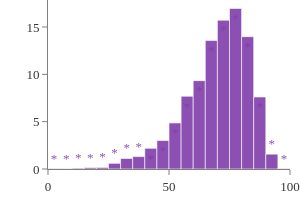

In [68]:
gen = pagri_data_tools.info_gen(df, column='avg_score', mode='column')
gen.next()

**Наблюдения:**  

- Средняя оценка лежит в диапазоне от 2 до 97.
- В основном средняя оценка находится в диапазон от 62 до 79.

### Категоризация данных


Объеденим продажи в одну числовую переменную и создадим категориальную переменную region

In [69]:
# Применяем melt для преобразования данных
value_vars = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df = pd.melt(df, id_vars=df.columns.difference(value_vars), 
                    value_vars=value_vars,
                    var_name='region', value_name='sales')
# Словарь для замены значений
region_mapping = {
    'na_sales': 'Северная Америка',
    'eu_sales': 'Европа',
    'jp_sales': 'Япония',
    'other_sales': 'Другие'
}

# Замена значений в столбце region
df['region'] = df['region'].replace(region_mapping).astype('category')
df.head(1)

,avg_score,critic_score,genre,name,platform,rating,user_score,year_of_release,region,sales
0,78.00,76.00,Sports,Wii Sports,Wii,E,80.00,2006,Северная Америка,41.36


Для оценки критиков и оценки пользователей создадим новые категориальные переменные.

In [70]:
labels = ['низкая', 'средняя', 'высокая']
bins = [-np.inf, 50, 80, np.inf]

In [71]:
df['critic_score_cat'] = pagri_data_tools.create_category_column(df.critic_score, labels=labels, bins=bins, fillnavalue='не укаазано')
df['critic_score_cat'].value_counts(dropna=False)

critic_score_cat
не укаазано    33840
средняя        21520
высокая         6972
низкая          3436
Name: count, dtype: int64

In [72]:
df['user_score_cat'] = pagri_data_tools.create_category_column(df.user_score, labels=labels, bins=bins, fillnavalue='не укаазано')
df['user_score_cat'].value_counts(dropna=False)

user_score_cat
не укаазано    35924
средняя        17856
высокая         9036
низкая          2952
Name: count, dtype: int64

Посмотрим на квантили в столбце продажи.

In [73]:
pagri_data_tools.quantiles_columns(df.sales, list(np.arange(0, 1, 0.1)))

Max,41.36
90,0.31
80,0.13
70,0.07
60,0.03
50,0.01
40,0
30,0
20,0
10,0
0,0


Создадим новую категориальную переменную из количества проданных копий.

In [74]:
df.isna().sum()

avg_score           31568
critic_score        33840
genre                   0
name                    0
platform                0
rating                  0
user_score          35924
year_of_release         0
region                  0
sales                   0
critic_score_cat        0
user_score_cat          0
dtype: int64

In [75]:
labels = ['мало', 'средне', 'много']
bins = [-np.inf, 0.01, 0.2, np.inf]
df['sales_cat'] = pagri_data_tools.create_category_column(df.sales, labels=labels, bins=bins)
df['sales_cat'].value_counts(dropna=False)

sales_cat
мало      33093
средне    23268
много      9407
Name: count, dtype: int64

Values,65 768 (100%),,мало (50%)
Missing,---,,средне (35%)
Distinct,3 (<1%),,много (14%)
Duplicated origin,65 765 (99.9%),,
Dupl (modify - origin),---,,
Empty,---,,
RAM (Mb),<1 Mb,,

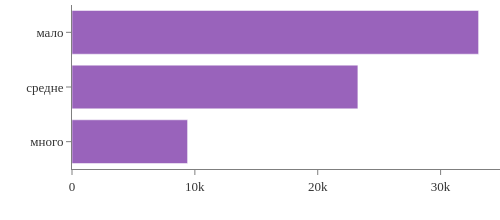

In [76]:
gen = pagri_data_tools.info_gen(df, column='sales_cat', mode='column')
gen.next()

### Промежуточный вывод


- Объеденили продажи в одну числовую переменную и создадили категориальную переменную region.
- Для оценок критиков и пользователей создадим новые категориальные переменные.
- Создали новую категориальную переменную из количества проданных копий.
- Создали новую числовую переменную из оценок пользователей и оценок критиков, усреднив их.
- Средняя оценка лежит в диапазоне от 2 до 97.
- В основном средняя оценка находится в диапазон от 62 до 79.

## Визуализация взаимосвязей переменных


### Сравнительный анализ распределений числовых переменных по категориям

In [271]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def histograms_stacked(df, cat_var, num_var, titles_for_axis=None, top_n=5, lower_quantile=0.05, upper_quantile=1
                       , bins=20, line_width=5, opacity = 0.5, height=None, width=None):
    if not titles_for_axis:
        title = f'Гистограмма для {num_var} в зависимости от {cat_var}'
        xaxis_title = num_var
        yaxis_title = 'Частота'
        legend_title = cat_var
    else:
        title = f'Гистограмма для {titles_for_axis[num_var][1]} в зависимости от {titles_for_axis[cat_var][1]}'
        xaxis_title = f'{titles_for_axis[num_var][0]}'
        yaxis_title = 'Частота'    
        legend_title = f'{titles_for_axis[cat_var][0]}'
    # Получение топ N категорий
    categories = df[cat_var].value_counts().nlargest(top_n).index.tolist()

    # Создание графика
    fig = go.Figure()
    colors = ['rgb(127, 60, 141)', 'rgb(17, 165, 121)',
              '#03A9F4', 'rgb(242, 183, 1)', 'rgb(231, 63, 116)', '#8B9467', '#FFA07A', '#005A5B', 
              '#66CCCC', '#B690C4']

    # Проход по каждой категории и построение гистограммы
    for indx, category in enumerate(categories):
        data = df[df[cat_var] == category][num_var]
        
        # Обрезка данных по квантилям
        lower_bound = data.quantile(lower_quantile)
        upper_bound = data.quantile(upper_quantile)
        trimmed_data = data[(data >= lower_bound) & (data <= upper_bound)]

        # Вычисление гистограммы
        hist_values, bin_edges = np.histogram(trimmed_data, bins=bins)
        hist_values = np.append(hist_values, 0)
        # Нормирование значений гистограммы в процентах
        hist_values_percent = hist_values / hist_values.sum() * 100

        # Подготовка данных для ступенчатого графика
        x_step = []
        y_step = []

        for i in range(len(hist_values_percent)):
            x_step.append(bin_edges[i])  # Точка на оси X
            y_step.append(0 if i == 0 else hist_values_percent[i-1])  # Если первая точка, то 0, иначе - предыдущее значение
            x_step.append(bin_edges[i])  # Точка на оси X для вертикального подъема
            y_step.append(hist_values_percent[i])  # Значение гистограммы

        # Добавление линии ступеней на график
        fig.add_trace(go.Scatter(
            x=x_step,
            y=y_step,
            mode='lines',
            name=str(category),
            line=dict(width=line_width, color=colors[indx % len(colors)]),
            opacity=opacity  # Установка прозрачности
        ))

    # Настройка графика
    fig.update_traces(
        hovertemplate='Значение = %{x}<br>Частота = %{y:.2f}<extra></extra>')
    # Отображение графика
    fig.update_layout(
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        legend_title_text=legend_title,
        barmode='overlay',
        height=height,
        width=width,
        title=title,
        # Для подписей и меток
        title_font=dict(size=16, color="rgba(0, 0, 0, 0.7)"),     
        font=dict(size=14, family="Segoe UI", color="rgba(0, 0, 0, 0.7)"),
        xaxis_title_font=dict(size=14, color="rgba(0, 0, 0, 0.7)"),
        yaxis_title_font=dict(size=14, color="rgba(0, 0, 0, 0.7)"),
        xaxis_tickfont=dict(size=14, color="rgba(0, 0, 0, 0.7)"),
        yaxis_tickfont=dict(size=14, color="rgba(0, 0, 0, 0.7)"),
        xaxis_linecolor="rgba(0, 0, 0, 0.4)",
        yaxis_linecolor="rgba(0, 0, 0, 0.4)", 
        xaxis_tickcolor="rgba(0, 0, 0, 0.4)",
        yaxis_tickcolor="rgba(0, 0, 0, 0.4)",  
        legend_title_font_color='rgba(0, 0, 0, 0.7)',
        legend_title_font_size = 14,
        legend_font_color='rgba(0, 0, 0, 0.7)',
        hoverlabel=dict(bgcolor="white"),
        xaxis=dict(
            visible=True, showgrid=True, gridwidth=1, gridcolor="rgba(0, 0, 0, 0.1)"
        ), yaxis=dict(
            range=[0, None], visible=True, showgrid=True, gridwidth=1, gridcolor="rgba(0, 0, 0, 0.07)"
        ),          
    )
    return fig
titles_for_axis = dict(
    # numeric column ['Именительный падеж', 'для кого / чего']
    avg_score = ['Средняя оценка', 'средней оценки']
    # categorical column ['Именительный падеж', 'для кого / чего']
    # Распределение долей по городу и тарифу с нормализацией по городу
    , genre = ['Жанр', 'жанра']
)
histograms_stacked(df, 'genre', 'avg_score', titles_for_axis=titles_for_axis, top_n=3, lower_quantile=0.01, upper_quantile=1, bins=20, line_width=3, opacity = 0.6)

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def plot_histograms(df, num_var, cat_var, bins=30, lower_quantile=0.0, upper_quantile=1.0, step=True):
    """
    Строит наложенные гистограммы (ступенчатые или обычные) для числовой и категориальной переменной.
    
    :param df: DataFrame, содержащий данные
    :param num_var: строка, имя числовой переменной
    :param cat_var: строка, имя категориальной переменной
    :param bins: количество бинов для гистограммы
    :param lower_quantile: нижний квантиль для обрезания (по умолчанию 0.0)
    :param upper_quantile: верхний квантиль для обрезания (по умолчанию 1.0)
    :param step: если True, строит ступенчатую гистограмму, если False — обычную
    """
    # Уникальные значения категориальной переменной
    categories = df[cat_var].unique()
    
    # Создание графика
    fig = go.Figure()
    colors = ['rgb(127, 60, 141)', 'rgb(17, 165, 121)', 'rgb(231, 63, 116)',
                        '#03A9F4', 'rgb(242, 183, 1)', '#8B9467', '#FFA07A', '#005A5B', '#66CCCC', '#B690C4', 'rgb(127, 60, 141)', 'rgb(17, 165, 121)', 'rgb(231, 63, 116)',
                        '#03A9F4', 'rgb(242, 183, 1)', '#8B9467', '#FFA07A', '#005A5B', '#66CCCC', '#B690C4']
    # Проход по каждой категории и построение гистограммы
    for indx, category in enumerate(categories):
        data = df[df[cat_var] == category][num_var]
        
        # Обрезка данных по квантилям
        lower_bound = data.quantile(lower_quantile)
        upper_bound = data.quantile(upper_quantile)
        trimmed_data = data[(data >= lower_bound) & (data <= upper_bound)]
        
        # Вычисление гистограммы
        hist_values, bin_edges = np.histogram(trimmed_data, bins=bins)

        if step:
            # Подготовка данных для ступенчатого графика
            x_step = []
            y_step = []

            for i in range(len(hist_values)):
                x_step.append(bin_edges[i])  # Точка на оси X
                y_step.append(0 if i == 0 else hist_values[i-1])  # Если первая точка, то 0, иначе - предыдущее значение
                x_step.append(bin_edges[i])  # Точка на оси X для вертикального подъема
                y_step.append(hist_values[i])  # Значение гистограммы

            # Добавление линии ступеней на график
            fig.add_trace(go.Scatter(
                x=x_step,
                y=y_step,
                mode='lines',
                name=str(category),
                line=dict(width=2, color=colors[indx % len(colors)])  # Использование цвета из списка
                # line=dict(width=2, color=colors[indx % len(colors)], shape='hvh')  # Использование цвета из списка
            ))
        else:
            # Добавление обычной гистограммы на график
            fig.add_trace(go.Histogram(
                x=trimmed_data,
                name=str(category),
                opacity=0.5,
                histnorm='probability density',
                # marker_color=colors[indx % len(colors)]  # Использование цвета из списка
                # marker=dict(
                #     color='blue',  # Цвет заливки
                #     line=dict(
                #         color='red',  # Цвет границы
                #         width=2       # Ширина границы
                #     )
                # )                
            ))
    # Настройка графика
    fig.update_layout(title='Наложенные гистограммы',
                      xaxis_title='Значение',
                      yaxis_title='Частота',
                      barmode='overlay')  # Наложение графиков

    # Отображение графика
    fig.show()

# Вызов функции с обрезанием по нижнему и верхнему квантилям и ступенчатой гистограммой
# plot_histograms(df, 'avg_score', 'genre', lower_quantile=0, upper_quantile=0.75, step=False)

# Вызов функции с обычной гистограммой
# plot_histograms(df, 'sales', 'region', lower_quantile=0, upper_quantile=0.75, step=False)

In [81]:
df.genre.value_counts()[:3].index.tolist()

['Action', 'Sports', 'Misc']

In [ ]:
# дискретный
px.colors.qualitative.swatches()

In [ ]:
px.box(df, x='avg_score', color='genre', notched=True)

In [470]:
lower_bound = df.sales.quantile(0)
upper_bound = df.sales.quantile(0.75)
trimmed_data = df[(df.sales >= lower_bound) & (df.sales <= upper_bound)]
# trimmed_data.sales.plot.hist(alpha=0.5)
# trimmed_data.groupby('region')['sales'].plot(kind='hist', histtype='step',alpha=1, linewidth=3);

Берем каждую числовую переменную и строим накладывающиеся гистограммы для всех категорий.  
И так повторяем для всех числовых переменных.

### Исследование корреляционных связей

Следим за правильным порядком переменных полученных из времени

Чтобы подготовить title_for_axis, пишем ии так  

запомни - total_images = ['Число фотографий', 'числа фотографий', 0], - тут первый элемент списка это общая форма и с большой буквы, второй элемент это форма первого элемента при ответе на вопрос Чего и третий элеент списка это род элемента (0 - средний род, 1 - мужской род, 2 женский род) понятно?  

и далее даем список нужных названий колонок в таком виде 

Для корреляций достаточно просто указать название без рода и склонения

Сормируем словарь для подписей осей и названий графиков.

In [ ]:

titles_for_axis= dict(
        total_images = 'числа фотографий',
        last_price = 'цена',
        total_area = 'общая площадь',
        rooms = 'число комнат',
        ceiling_height = 'высота потолков',
        floors_total = 'всего этажей',
        living_area = 'жилая площадь',
        floor = 'этаж'
)

ВАЖНО  
проверить, что все категориальные переменные по прежнему имеют категориальный тип, чтобы при анализе они не поетрялись

In [ ]:
df.dtypes

In [ ]:
for key, df in dict(
            df_users = df_users
            , df_calls = df_calls
            , df_messages = df_messages
            , df_internet = df_internet
            , df_tariffs = df_tariffs
            , df_calls_full = df_calls_full
            , df_messages_full = df_messages_full
            , df_internet_full = df_internet_full
            , df_by_userid_month = df_by_userid_month
            , df_arpu = df_arpu).items():
    print(key)
    display(df.dtypes)

>Топ n значений одного столбца по значениям в другом
>Сделать функцию, чтобы в столбцах, где бльше 20 уникльных значений посмотреть топ n значений по другой колонке.  
>Например, топ 10 покупателей по сумме покупок и прочее.  
>Идея в том, что если  в столбце до 20 уникальных значений, то мы проанализируем комбинации с другими стобцами на графиках.  
>А вот если у нас столбец не числовой и в нем больше 20 уникальных значений, то на графике мы не сможем понять топ n.

>Изучаем топ n значений в категориальных столбцах датафрейма, где значений больше порогового, по значению в столбце value_column.  
>Тут можно делать разные топы, использовать разные функции.  
>Задача изучить то, что мы не сможем изучить на графиках из-за болшого количества занчений в категориальной переменной,  
>поэтому мы берем топ n значений.  

In [ ]:
gen = pagri_data_tools.top_n_values_gen()
next(gen)

>Чтобы сравнить метрики между собой мы можем
- использовать корреляционный анализ (Пирсена, Спирмена, Кенделла)


>`heatmap_corr(df)`

( r = 1 ): Полная положительная линейная зависимость.  
( 0.7 < r < 1 ): Сильная положительная линейная зависимость.  
( 0.3 < r \leq 0.7 ): Умеренная положительная линейная зависимость.  

Если числовых переменных не много и они входят на один график, то просто строим график

In [ ]:
pagri_data_tools.heatmap_corr(df)

Лучше лишние ячейки убирать, если есть возможность 

In [ ]:
pagri_data_tools.heatmap_corr(df_by_userid_month[['sessions_per_day', 'calls_per_day']])

Если нужно быстро просмотреть, то проганяем в цикле

In [ ]:
for key, df in dict(
            df_users = df_users
            , df_calls = df_calls
            , df_messages = df_messages
            , df_internet = df_internet
            , df_tariffs = df_tariffs
            , df_calls_full = df_calls_full
            , df_messages_full = df_messages_full
            , df_internet_full = df_internet_full
            , df_by_userid_month = df_by_userid_month
            , df_arpu = df_arpu).items():
    print(key)
    display(pagri_data_tools.heatmap_corr(df))

Если переменных много и нужно разделить на части, то используем эту функцию 

In [ ]:
gen = pagri_data_tools.heatmap_corr_gen(df, part_size=10, titles_for_axis=titles_for_axis)
next(gen)

>Использование регрессии и случайного леса для определения влияния переменных  

>Коэффициенты регрессии позволяют оценить влияние каждой переменной на целевую переменную, учитывая влияние других переменных,  
>в то время как важные компоненты в случайном лесе позволяют оценить важность каждой переменной для предсказания целевой переменной.

>Используем регрессиию

>Чтобы построить регрессию и посмотреть стат значимость и коэффициенты удобно использовать модуль statsmodel

>VIF означает Variance Inflation Factor (Фактор инфляции дисперсии). Это статистическая метрика,   
>используемая для обнаружения мультиколлинеарности (сильной корреляции) между предикторами (фичами) в линейной регрессии.

>Обычно, VIF интерпретируется следующим образом:
>
- VIF < 5: слабая мультиколлинеарность
- 5 ≤ VIF < 10: умеренная мультиколлинеарность
- VIF ≥ 10: сильная мультиколлинеарность

>
>Смотрим R2 (коэффициент детерминации)
- использовать коэффициенты у регресси
>Мы строим регрессию и смотрим, у каких метрик больше коэффициенты. Таким образом мы поймем какие метрики сильнее зависят с целевой.  
>Важно, чтобы независимые переменные некоррелировали по отдельности и вместе (мультиколлиниарность).  
>По отдельности смотрим матрицу корреляции.  
>Чтобы определить коррелириуют ли вместе, береме независимые переменные,  
>и перебираем их выбирая одну из них целевой и смотрим R2.  
>Если R2 большой, то значит эта метрика (которая целевая на этом шаге) хорошо описывается другими и ее можно выбросить.
>Также не забываем поправки на гетероскедостичность (HC0, HC1, HC2, HC3) в статпакетах.  
>Нам нужно ответить на следующие вопросы
>    - Влияет ли метрика на целевую?
>    Оцениваем коэффициенты в уравнении регресси у каждой метрики.  
>    - Как влияет метрика на целевую?
>    Смотрим R2 (коэффициент детерминации). И определяем какая часть целевой переменной определяется независимыми метриками.  
>    - Коэффициенты при метриках в уравнении статистически значим? При какаом уровне значимости?
>    Смотрим в стат пакете p value для каждого коэффициента, что нам говорит значим ли этот коэффициент.  
>    То есть мы не просто смотрим его абсолютное значение, а учитываем p value.   
>    - Дайте содержательную интерпретацию коэффицентам?
>    При увеличении метрики k на 1, целевая метрика увеличивается на $b_{k} * 1$
>    То есть нужно перевести коэффициенты в реальное сравнение, насколько увелчисться целевая метрика при изменении определенной метрики на 1
>    - Найдите 95 процентный доверительный интервал.
>    В стат пакете смотрим значение и оно говорит, что если мы многократно повторим ноши вычисления с новыми данными, то 95 процентов наших  
>    полученных коэффицентов будут лежать в этом диапазоне.  

>Строим модель и изучаем результат  
>`linear_regression_with_vif`

In [ ]:
pagri_data_tools.linear_regression_with_vif()

>Испльзовать коэффициенты у классификацию    
>Строим случайный лес какие метрики сильнее всего влияют на решения модели.   
>`plot_feature_importances_classifier`   
>`plot_feature_importances_regression`

>Тут нужно подумать как использовать категориальные переменные тоже   
>Нужно их перевести в one hot encoding или подобное, чтобы также проверить силу их влияния на целевую перменную

In [ ]:
titles_for_axis = dict(
    debt = 'долга'
    , children = 'Кол-во детей'
    , age = 'Возраст'
    , total_income = 'Доход'
)
title = 'График важности признаков для предсказания цены'
pagri_data_tools.plot_feature_importances_classifier(df, target='debt', titles_for_axis=titles_for_axis, title=title)
pagri_data_tools.plot_feature_importances_regression()

>На основе полученных данных формулируем гипотезы, которые будем проверять в блоке проверки гипотез

> используем быблиотеку `shap`, чтобы определить метрики, которые лучше других помогают предсказывать целевую перемменную

Добавить в dash app возможность сохранять код для ячейки с фильтром (срезом данных).  
То есть у нас есть фильтр, мы хотим посмотреть срез данных и фильтруем данные.  
И если увидели что-то важное, то мы сохраняем код для создания графика с этими x, y, category и фильтром.  
То есть в коде сначала будет фильтрация датафрейма и потом создание графика в 2 строки.  

важно мы не пишем все наблюдения, а только те, которые могут быть важны для анализа, то есть мы смотрим, задаем вопросы данным и   
и если ответ важен, то мы записываем наблюдения)

ВАЖНО   
Когда мы видим таблицу или график, то мы придумываем вопросы к результату.  
Все возможные вопросы (как, почему, зачем, сколько, как долго, быстро ли, медленно ли, важно ли это, из-за чего это и прочие вопрсоы)
И отвечая на эти вопросы мы получаем наблюдения и выводы
И чтобы задавать правильные вопросы, мы должны сначала подумать о физике параметров, которые мы видим.

Если у нас много значений в переменной, то мы агрегируем данные и можем построить бары.  
Но если мы агрегируем данные по переменной, в которой много значений и нам это нужно.  
То мы не сможем построить бары, и тогда мы строим гистограмму. То есть мы берем, например, для каждой заправки считаем среднее время заправки и так как у нас много заправок,  
но мы хотим визуализировать среднее время по ним, и не агрегировать по другому параметру, то мы можем испльзовать гистограмму.  
В данном случае гистограмма своего рода агрегация в бины, то есть мы получаем как бы новую переменную из бинов, в каждом бине будет агрегированы данные.  
Это работает, когда нам нужно просто посмотреть колечество, так как в бинах будет количество. Таким образом мы получаем сколько у нас заправок имеют определенное среднее вермя заправки.


> Про размер графиков  
> Стандартный размер графиков width=600, height=400  
> Для более сложных графиков, когда требуется больше места для отображения данных, можно использовать размеры width=800, height=600 или width=1000, height=800


> Сравнивать количество элементов нужно в абсолютных и относительных величинах.  
> Когда мы сравниваем только в абсолютных величинах, мы не учитываем размеры групп.  
> В одной группе может быть элементов больше чем в другой и тогда сравнение будет не совсем точным.  
> Если у нас 2 категориальные переменные, то мы можем сравнивать отностельные величины  
> по одной переменной, а можем по другой.  
> Это как сравнивать суммарный возраст в группах, это не дает полной картины и мы сравниваем средний возраст,  
> чтобы размер группы не влиял.


> ВАЖНО
> Анализ графиков и выводы для них должны полностью перекрывать постановку задачи и цель.  
> Это значит, что если цель проанализировать зависимость наличия долга, то мы в идеале должны проанализировать  
> влиянеие каждой переменной на наличие долга (числовой и категориальной)  
> Кончено нужно проанализировать все возможные зависимости.  
> Но все зависимости с переменной в постновке задачи мы обязаны проверить и дать выводы. И о наличии и об отсутствие.  
> Важные выводы делаем не только о наличие интересных моментов, но и об отсутствие.


> Сначала раздел графиков  
> На основе графиков формируются гипотезы (например, у нас у мужчин зп больше)
> И после раздела графиков идет раздел проверки гипотез. Тут мы првоеряем разные гипотезы новые и те, что увидели на графиках.  
> Это правильная последовательность сначала изучили графики и потом на основе их сформировали гипоетзы
> Перед разделом про графики идет раздел с корреляцией и поиском главных компонет случайного леса.  
> Мы выбиарем переменную, для которой мы далее хотим посмотреть разыне зависимости и указываем ее целевой для сучайного леса  
> И смотрим какие фичи сильнее влияют.  
> И теперь можем построить графики с целевой перменно и этими главными фичами и в выводе можно указать про то что это важные компоненты случаного леса


> На основе полученных данных формулируем гипотезы, которые будем проверять в блоке проверки гипотез


### Изучение зависимостей между числовыми переменными


> Изучаем scatter plots


ВАЖНО смотрим на выбросы  
Мы могли при изучении отдельных столбцов не заметить их, если заметили, то возвращаемся в изучение и предобработку и изучаем их дополнительно

In [ ]:
titles_for_axis = dict(
    # numeric column
    children = 'Кол-во детей'
    , age = 'Возраст'
    , total_income = 'Доход'    
)

In [ ]:
pairs = {('total_images', 'last_price'): None, ('total_images', 'floors_total'): {'total_images': [-2.15, 22.45], 'floors_total': [0.51, 28.54]}, ('total_images', 'kitchen_area'): {'total_images': [-1.04, 28.44], 'kitchen_area': [-0.6, 59.26]}, ('total_images', 'parks_nearest'): {'total_images': [np.int64(0), np.int64(50)], 'parks_nearest': [np.float64(1.0), np.float64(3190.0)]}, ('total_images', 'ponds_around3000'): {'total_images': [np.int64(0), np.int64(50)], 'ponds_around3000': [np.float64(0.0), np.float64(3.0)]}, ('total_images', 'living_total_ratio'): {'total_images': [np.int64(0), np.int64(50)], 'living_total_ratio': [np.float64(0.02), np.float64(1.0)]}, ('total_images', 'kitchen_total_ratio'): {'total_images': [np.int64(0), np.int64(50)], 'kitchen_total_ratio': [np.float64(0.03), np.float64(0.79)]}, ('total_images', 'price_per_sqm'): {'total_images': [np.int64(0), np.int64(50)], 'price_per_sqm': [np.int64(7962), np.int64(1907500)]}, ('last_price', 'living_area'): {'last_price': [np.int64(430000), np.int64(763000000)], 'living_area': [np.float64(2.0), np.float64(427.55)]}}
pagri_data_tools.pairplot_pairs(df, pairs, coloring=True, horizontal_spacing=0.12, rows=3, cols=3).show(config=dict(displayModeBar=False, dpi=200), renderer="png")
# если нужно интерактивый график, то
pagri_data_tools.pairplot_pairs(df, pairs, coloring=True, horizontal_spacing=0.12, rows=3, cols=3)

Чтобы в dash app выбрать нужные пары для scatterplot   
ставим  `_gen_` в месте где хотим чтобы появились ячейки с кодом для постройки графиков      
далее используем  `pagri_dash.scatterplot_analysis_dash`

In [ ]:
_gen_ 

ВАЖНО  
убираем лишние колонки, которые нам не нужно изучать, например, id, и другие числовые переменные, которые будут только тратить место в dash app

In [ ]:
df_by_userid_month.drop(['user_id', 'messages_included'], axis=1)

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
pagri_dash.scatterplot_analysis_dash(df, "path/to/notebook/for/save")

### Изучение зависимостей между категориальными переменными


> Чтобы автоматически генерировались подписи осей и заголовок графика для категориальных, временных и числовых с категориальными зависимостейь
> , нужно заполшнить такой словарь.  
> Первый элемент списка - это подпись оси  
> Второй элемент списка - это как это название будет отображаться в заголовке графика  
> Для числовых столбцов также указывается род, чтобы правильно выбрать (Середнее, средний, средняя) (0 - средний род, 1 - мужской род, 2 - женский род)


ВАЖНО построить распределение количества по категориальным переменным без разбивки по другим категориям.  
То есть например, посмотреть количество новых пользователей по месяцам, по кородам и так далее.  
И так все количества, и не только категориальные.  
Это важно, так как по этим графикам будет видна общая динамика без разбивки на категории.  
И плюс всякие user_id и прочее в dash app не отображается, поэтому нужно это изучить отдельно.  

ВАЖНО  
Добавить возможность выбирать 1 col и 2 cols  как это в app dash числовые и категориальные  
Так как часто полезно посмотреть на распределение количества только в одной категории.

In [ ]:
f'Среднее / Медианное / Суммарное {numeric} в зависимости от {category} и {category}'  

ВАЖНО  
titles_for_axis далее будет один для всех разделов  
поэтому если нужно добавить, то возвращаемся и добавляем сюда, чтобы была одна переменная

Сормируем словарь для подписей осей и названий графиков.

In [ ]:
titles_for_axis = dict(
    # numeric column ['Именительный падеж', 'мменительный падеж с маленькой буквы', 'род цифорой']
    # (0 - средний род, 1 - мужской род, 2 - женский род[) (Середнее образовние, средний доход, средняя температура) )
    # для функций count и nunique пишем - Количество <чего / кого количество> - и также с маленькой буквы, цифра 0 в качестве рода
    age = ['Возраст', 'возраст', 1]
    , using_duration = ['Длительность использования', 'длительность использования', 2]
    , mb_used = ['Объем интернет трафика', 'объем интернет трафика', 1]
    , revenue = ['Выручка', 'выручка', 2]
    # categorical column ['Именительный падеж', 'для кого / чего', 'по кому чему']
    # Распределение долей по городу и тарифу с нормализацией по городу
    , city = ['Город', 'города', 'городу']
    , tariff = ['Тариф', 'тарифа', 'тарифу']
    , is_active = ['активный ли клиент', 'активности клиента', 'активности клиента']
)

Важно когда мы смотрем очередной график, то задавать не только вопросы к данным, но и думать как можно отфильтровать  
данные, чтобы сделать дополнительные полезные выводы.  
То есть мы фильтруем данные и потом эти графики поместим в раздел с анализом срезов.  

Чтобы в dash app выбрать нужные пары для scatterplot   
ставим  `_gen_` в месте где хотим чтобы появились ячейки с кодом для постройки графиков      
далее используем  `pagri_dash.scatterplot_analysis_dash`

In [ ]:
_gen_ 

Как правильно писать выводы для нормализации по col и row:
В dash app нормализация идет по значениям в легенде,   
Например, у нас по index - город, а по столбцам - тарифы.
- нормализация по index (в dash будет row)  
При нормализации по индексам вы получаете долю пользователей каждого тарифа в каждом городе относительно общего числа пользователей в этом городе.
то есть если по оси город, а в легенде название тарифа, то нормализация будет по тарифам.  
И мы сравниваем 
А если в легенде город, то нормализация идет по городам, и мы сравниваем по городам.  
И можно сделать такие выводы  
    - В Москве 60% пользователей выбирают тариф "Ультра", что указывает на его популярность среди москвичей.
    - В Санкт-Петербурге 70% пользователей предпочитают тариф "Смарт", что может говорить о том, что данный тариф более привлекателен для жителей этого города.
то ессть при нормализации по городу, мы получаем долю пользователей тарифа в городе.  
- нормализация по столбцам (в dash будет col)  
При нормализации по столбцам вы получаете долю пользователей каждого города для каждого тарифа относительно общего числа пользователей, выбравших этот тариф.
А когда мы нормализуем по тарифу, то мы получаем долю пользователей города в тарифе.      
    - Из всех пользователей, выбравших тариф "Ультра", 40% приходятся на Москву, что может указывать на то, что этот тариф пользуется спросом именно в этом городе.
    - Из всех пользователей, выбравших тариф "Смарт", 50% находятся в Санкт-Петербурге, что может свидетельствовать о том, что данный тариф более популярен среди петербуржцев.
- Нормализация по всем значениям (в dash all)    
При нормализации по всем значениям вы получаете долю пользователей каждого тарифа в каждом городе относительно общего числа пользователей всех тарифов в обоих городах.
    - В общем числе всех пользователей (Москва и Санкт-Петербург) 30% выбирают тариф "Ультра", что может указывать на его общую популярность.
    - Тариф "Смарт" составляет 20% от общего числа пользователей, что показывает, что он менее популярен по сравнению с тарифом "Ультра" на уровне всей выборки.

Сначала смотрим 1_cat, чтобы записать распределение по 1 категории.  
Не забываем делеть swap_cols чтобы изучить обе категориальные переменные.  
Записываем, если есть различия в долях в категории.  

In [ ]:
import sys
sys.path.append('/colab/pagri_private_modules')
import pagri_dash
pagri_dash.category_analysis_dash(df, 'df', "path/to/notebook/for/save")

> Строим матрицу тепловой карты для категориальных переменных и изучаем зависимости  


Чтобы в dash app выбрать нужные пары для scatterplot   
ставим  `_gen_` в месте где хотим чтобы появились ячейки с кодом для постройки графиков      
далее используем  `pagri_dash.scatterplot_analysis_dash`

In [ ]:
_gen_ 

In [ ]:
import sys
sys.path.append('/home/pagri/git_repos/pagri_private_modules')
import pagri_dash
pagri_dash.categorical_heatmap_matrix_dash(df, 'df', "/home/pagri/git_repos/pagri-projects/quarto/projects/housing-ads-investigation/temp.ipynb")

> Посмотрим на распределение количества элементов между группами


> Нужно подумать как отобразить не только процент от всего количества, но и пороцент в группе  
> То есть у нас есть значение в ячейке, сумма всех, сумма по категории на оси x и сумма по категории на оси Y  
> Вот нужно как-то отобразить процент от суммы, процент от одной категории и от другой категории


In [ ]:
12 (0.5% of total, 20% of row, 15% of col) 

> Можно сделать кнопки, чтобы можно было подсветку делать внури колонок и строк


> Можно сделать кнопки (процент от общего) (процент от тут указывается название оси x) (аналогично для второй оси)


In [ ]:
pagri_data_tools.categorical_graph_analys_gen()

> Строим treemap  
> `treemap`  
> `treemap_dash`
>
> ```
> app = treemap_dash(df)
> if __name__ == '__main__':
>    app.run_server(debug=True)
> ```


In [ ]:
pagri_data_tools.treemap()

In [ ]:
app = pagri_data_tools.treemap_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

> Строим parallel_categories  
> `parallel_categories `  
> `parallel_categories_dash `
>
> ```
> app = treemap_dash(df)
> if __name__ == '__main__':
>    app.run_server(debug=True)
> ```


In [ ]:
pagri_data_tools.parallel_categories()

In [ ]:
app = pagri_data_tools.parallel_categories_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

> Строим Sankey  
> `sankey `  
> `sankey_dash`
>
> ```
> app = treemap_dash(df)
> if __name__ == '__main__':
>    app.run_server(debug=True)
> ```


In [ ]:
pagri_data_tools.sankey()

In [ ]:
app = pagri_data_tools.sankey_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

### Изучение зависимостей между числовыми и категориальными переменными


добавить слайдер как доп переменную и анимация будет сразу

In [ ]:
df = px.data.gapminder()

fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000], width=900, height=500)
fig.show()

Важно когда мы смотрем очередной график, то задавать не только вопросы к данным, но и думать как можно отфильтровать  
данные, чтобы сделать дополнительные полезные выводы.  
То есть мы фильтруем данные и потом эти графики поместим в раздел с анализом срезов.  

> Можно добавить кнопку среднее и количество  
> Чтобы можно было посмотртеть распределение по количеству, когда смотрить среднее.


In [ ]:
_gen_ 

Добавить в hover количество элементов в группе,  
чтобы понимать размер группы.

Добавить возможность перескакивать комбинации.  
Если много колонок, то комбинаций очень много и часть может быть просто не нужна для анализа.  

Изучаем следующим образом  
- смотрим на график и определяем есть ли взаимодейсвие (то есть отличаются ли значения в разных группах, это будет видно как разная высота баров)
- если разницы в барах нет, или она минимальная, то сразу можно пропускать
- если разница есть, то думаем важна ли для нас ээта комбинация столбцов
- если нет, то пропускаем
- если да, то пишем наблюдения и сохраняем

Не забываем смотреть 1_cat чтобы изучить отдельную категорию.  
То есть график появлился, смотрим на обе категории и на числовую переменную и думаем, нужно ли нам по отдельности изучить  
каждую категориальную переменную c числовой. Если уже изучили, то не изучаем.
Нужно подумать как сохранять уже изученые комбинации, чтобы не повторяться (может в dash app добавить всплывающее окно, для графиков, для которых уже был вывод, что уже было)

ВАЖНО  
Если много переменных, и не все они нужны для анализа,  
то смотрим df.columns, выбираем нужные и в dash передаем датафрейм с нужными колонками.

ВАЖНО  
не забываем смотреть sum для переменных типа выручки

ВАЖНО  
id это такая же числовая переменная, как и все остальные, но ее нужно аггрегировать, используя  
`count` и `nunique`

In [ ]:
import sys
sys.path.append('/home/pagri/git_repos/pagri_private_modules')
import pagri_dash
pagri_dash.numeric_category_analysis_dash(df, 'df', "/home/pagri/git_repos/pagri-projects/quarto/projects/housing-ads-investigation/temp.ipynb")

### Анализ временных зависимостей


Проходим и из предыдущих разделов копируем все графики с временными переменными и вставляем сюда.

Когда мы хотим изучить верменную зависимость, то нам нуно создать новые переменные с обрезанными (trunc or round) значениям, чтобы можно было сгруппировать используя groupby or pivot_table  
по этой обрезанной переменной и применить функцию агрегации и построить график, например, среднее время заправки на азс по часам.  
Вот когда мы работаем с временем, нам нужно думать какие переменные создать, обрезая текущее время.


> Строим когортный анализ, если есть возможность


> Если у нас есть даты, то мы можем посмотреть не просто абсолютные значения на каждую дату какой-то метрики,  
> а посмотреть относительные значения относительно предыдущего значения.  
> Для этого нужно составить таблицу, в которой будет изменение в процентах относительно предыдущего значения.  
> И затем визуализировать для каждой даты динамику этого показателя


### ВАЖНО

- Берем все датафреймы, которые анализировали.  
- И по очереди выводим все колонки, с указанием категориальная, числовая или другая.  
- Собираем все выводы от графиков. 
- И внимательно думаем, какие зависимости мы пропустили.  
- Строим их

In [ ]:
df_by_userid_month.dtypes

### Анализ срезов данных 

ВАЖНО  
если у нас по условию задачи нужно сравнить что-то, то нужно построить наложенные гистограамы (в виде каги) каждой категории.  
То есть если мы сравниваем тарифы, то нужно наложить гистограммы выручки, количества сообщений, звонков, гигабайт и так далее.  
Таким образом мы не только сравниваем аггрегирующие метрики на графике, разбивая метрику по категории, но и   
строим накладывающиеся гистограммы по каждой категории. Это очено важно, так как дает более глубокое сравнение.  

Вообще если есть время, то в идеале построить накладывющиеся гистограммы для всех важных числовых метрик по всем важным категориям.  
То есть берем метрику и категориальную переменную и строим гистограмму.  
Нужно сделать отдельную функцию.  

ВАЖНО  
Если у нас есть странные значения, например нулевая длительность звонков, или что-то подобное,   
то это также является срезом, который нужно изучить. Не только при предобработке, когда мы смотрели это по категориям.  
Тут мы не только смотрим по категориям на графиках, но ещё и смотрим все метрики и графики для этого среза или срезов.  
Таким образом выбросы, пропуски и любые аномальные занчения, которые можно объеденить в группу, являются срезом.  
И этот срез нужно отдельно изучить, построив все графики, которые строили для общего датафрейма.  

Срезы нужно обязательно сравнить со всем датафреймом.  
То есть мы например, изучили центр города и нужно сделать выводы основываясь на сравнении центра и всего города.

Нужно создать 2 генератора и параллельно идти, чтобы сначала выводился срез, а потом уже целый датафрейм.  
Тут наша задача не изучать выбросы, дубли и прочее.  
Тут задача найти отличия среза от всего датафрейма.

Возможно лучше прйти все колонки так попарно, а потом выбрать только те, которые имеют отличия.  
И построить только их.

Срезы нужны не только чтобы изучить отдельно часть данных, важно сравнивать срез со всем датафреймом.  
Нужно подумать какие срезы будет полезно сравнить со всем датафреймом.  
И провести сравнительный анализ. И поместить в отчет то, что имеет отличия и важно для выводов.

Часто когда есть пользователи, то нужно изучить срезы активные и не активные пользователи.  
И постараться понять что отличает не активных.  

сделать приложение dash чтобы можно было выбирать колонки для анализа,  
чтобы можно было фильтровать по всем категориальным переменным,  
чтобы были слайдеры для фильтрации по числовым переменным,
чтобы можно было выбирать типы графиков и строить разные графики.  
Это не генератор, а это для ad-hoc анализа.   
То есть мы подумали что интересно будет изучить этот срез и эти переменные и изучили.  
А потом можно подумать как это автоматиировать, чтобы в цикле строились нужные графики.  

Анализ срезов состоит из анализа срезов из одного значения, то есть мы выбираем конкретное значени и по  нему фильтруем.  
и анализа срезов из нескольких переменных, когда мы выбираем несколько значений для среза или даже несколько переменных и в них выбираем определенные значения.  

Анализ срезов по одному значению мы просто фильтруем по нему и смотрим результат функции `info_gen` или 'info_column'  

А анализ срезво по нескольким значениям или переменным будет результатом анализа графиков в dash app.  
То есть мы в процессе анализа фильтруем данные и после работы в dahs app мы фильтрованные графики помещаюем в этот раздел.  
Чтобы разделить срезы и полный анализ.  

ВАЖНО  
Чтобы изучить активных и неактивных пользователей, нужно создать признак 'is_acitve'  
И внимательно посмотреть на графики с временными зависимостями, где во времени идет сранвение по 'is_active'  
Таким образом мы как бы посмотрим в прошлое, как вели себя пользователи, которые стали неактивными, и как вели себя активные пользователи

Нужно подумать как лучше изучать срезы.  
В данном разделе лучше изучить срезы отдельных значений, то есть отдельный город, отдельный пол и прочее.  
То есть мы фильтруем по одному значению и его изучаем в функцией `info`  
А изучение срезов данных, которые состоят из набора значений (например изучить цену в топ 10 городах), это уже будет сделано  
в анализе графиков.  

Тут мы изучаем подготовленный набор данных в разрезе разных категориальных переменных.  
Задача посмотреть на отдельные срезы и найти закономерности в данных.  

Например у нас есть данные о продажах квартир, мы создали новые категориальные перменные, обогатили данные  
И теперь хотим посмотреть какое распределение цены только в центре, или какая площадь квартир возле парков и прочее.  
То есть мы тут изучаем отдельно переменные в разрезе категорий, то есть строим срезы.  
ВАжно, что тут мы изучаем отедльные переменные, срезы в зависимостях переменных будем строить в разаделе визуализации. 

Определить цель. Прежде чем начинать анализ срезов, важно четко определить, какие вопросы вы хотите ответить или какие гипотезы хотите проверить. Это может включать:
- Сравнение различных групп (например, по возрасту, полу, региону).
- Изучение влияния определенных факторов на целевую переменную.
- Выявление аномалий или неожиданных паттернов в данных.

Выбор переменных для срезов. Выберите переменные, по которым вы хотите сделать срезы. Это могут быть как категориальные, так и количественные переменные. Примеры:
- Категориальные переменные: пол, категория товара, регион, уровень образования.
- Количественные переменные: возраст, доход, количество покупок (то есть мы можем просто взять срез с зарплатой до 100 тысяч и прочее, не обязательно иметь категорию для создания срезов, причем у нас может быть категория доходов, но срез мы можем взять в другом диапазоне).

Важно когда мы выбрали параметры по которым хотим сделать срез, то далее нужно выбрать условие по которому мы будем создавать срез.  
Срез это фильтрация или группировка, то есть должна быть либо функция аггрегации или значения по которым мы будем фильтровть.  
Например мы для среза выбрали параметр города. Теперь нам нужно отобрать города для среза.  
Мы выбираем параметр количество объявлений (все зависит от цели, можно было выбрать и количество населения, значение других параметров, все что поможет нам создать топ)
И далее по нему фильтруем или аггрегируем.  

Срезы данных можно создавать различными способами. Вот несколько подходов:
- Фильтрация данных: Используйте условия для выбора подмножеств данных.  
Например, выберите только тех клиентов, которые находятся в определенном регионе или имеют доход выше определенного порога.  
- Группировка данных: Используйте функции группировки (например, groupby в pandas для Python) для агрегирования данных по выбранным переменным.   
Это позволяет вам получить сводные статистики по группам.
- Кросс-табуляция: Для категориальных переменных создайте кросс-таблицы, чтобы увидеть взаимосвязи между переменными.

Анализ срезов. После создания срезов данных проведите анализ:
- Статистический анализ: Рассчитайте основные статистики (среднее, медиана, стандартное отклонение) для каждой группы или среза. Это поможет вам понять, как различаются группы по ключевым показателям.
- Визуализация: Постройте графики для визуального представления данных. Это могут быть:  
Гистограммы для распределения количественных переменных.  
Столбчатые графики для сравнения категориальных переменных.  
Ящики с усами (boxplots) для визуализации разброса и выявления аномалий.  
- Сравнительный анализ: Сравните срезы между собой. Например, как различается средний доход мужчин и женщин или как меняется поведение клиентов в зависимости от региона.

Если мы для среза выбрали одно значение (например конкретный город), то мы просто посмотреть результат функции`info` и проанализировать его  
Но если мы выбрали для среза набор значений, то нам нужно уже построить графики для сравнения стат параметров или других аггреигующих параметров  
для каждого занчения в срезе. То есть нам нужно выбрать параметры по которым мы будем сравнивать значения в срезе.  

Фильруем датасет по определенному значению и далее либо изучаем по отедльным столбцам, либо по всем испоьзуя генератор

То есть мы изучаем срез по одному значению

Созадем 2 генератора (или больше, если хотим сравнить несколько срезов), для среза и всего датафрейма и идем изучаем их вместе.  

Нужно сделать отдельный генератор, чтобы в нем не было информации про пропуски, нули и прочее,   
И организовать так, чтобы было удобно сравнивать.  
Также гистограммы нужно сделать на одном графике, чтобы накладывлись друг на друга и сделать прозрачность.    
Это очень удобно и если гистограммы будут накладываться друг на друга, то можно будет увидеть сразу отличия средних и мод на графике.    
В идеале сделать, чтобы были не столбцы, а типа каги, то есть линия со ступеньками, так удобнее сравнивать гистограммы. 

ОЧЕНЬ ВАЖНО  
- в наблюдения пишем обязательно диапазон значений столбца.  
Рынок жилья представлен объектами общей площадью от 12 до 900 кв.м. 
- пишем медианное занчение и по гистограмме и по квантилям определяем оснвоной диапазон.  
В основном это жилье от 30 до 100 кв.м. с пиком в сегменте 30-75 кв.м  
Это все нужно, чтобы потом сформулировать вот такой вывод (в оснвоном выводе отчета), то есть мы для разных столбцов пишем диапазоны,  
основной дипазаон, медианы, моды, а потом уже собираем это в 1 или несколько выводов,  
Например.  
Рынок жилья представлен объектами общей площадью от 12 до 900 кв.м. В основном это жилье от 30 до 100 кв.м. с пиком в сегменте 30-75 кв.м. В жилой площади квартиры преобладает диапазон 15-50 кв.м. Размер площади кухни-от 5 до 15 кв.м., с пиком 9 кв.м. Это стандартные небольшие квартиры эконом-класса. Подавляющее большинство квартир- 1-3 комнатные, с высотой потолка 2,6-2,7 м., но встречаются редкие варианты до 19 комнат и высотой потолка до 20 кв.м. (либо ошибка, либо свободная планировка с возможностью многоуровневости).


В итоге мы сраним диапазоны, моды, медианы в срезе и во всем датафйреме.  


Было бы идеально определить отличия в срезе и в общей картине, не просто сухими цифрами,  
а собрать все наблюдения вместе и расписать это в подобном виде-   
Рынок недвижимости центральной части города представлен несколько более широким по площади диапазоном : основная масса- это жилье от 30 до 150 кв.м с пиком в сегменте 45-80 кв.м. При этом жилая площадь занимает большую долю, чем среднестатистическая квартира: в центре СПб большое количество домов старой застройки, в которой пространство "сдвинуто" в пользу жилой площади. Особенностью этой части города является то, что большинство квартир, предлагаемых на продажу,- 2-3 комнатные: здесь в общей массе достаточно низкая доля 1-комнатного жилья и выше доля 4-комнатных квартир. Наибольшее количество предложений в абсолютном выражении (цена за объект) приходится на диапазон 5-15 млн.руб. с пиком 5-8 млн.руб.(маленькие квартиры эконом-класса), но есть и уникальные объекты стоимостью до 35 млн.руб. Стоимость квадратного метра недвижимости в основном варьируется от 70 до 150 тыс.руб. с пиком в 100 тыс.руб. Наряду с типовыми предложениями на продажу выставлено жилье со стоимостью 1 кв.м. до 266 тыс.руб за кв.м. В целом цены жилья центра города выше по цене, чем аналогичное в других районах.

In [ ]:
df_sliced = df[df.location_zone == 'Центр']
gen_slice = pagri_data_tools.info_gen(df_sliced)
gen = pagri_data_tools.info_gen(df)

In [ ]:
next(gen_slice)
next(gen)

Если есть что-то важное и есть отличия, по которым можно сделать выводы, то строим отдельно в отчет

In [ ]:
print('Центр города')
pagri_data_tools.info_column(df_sliced, 'last_price')
print('Весь датафрейм')
pagri_data_tools.info_column(df, 'last_price')

**Наблюдения:**  
- пишем тут наблюдения

ВАЖНО  
Сравниваем не только отдельные столбцы с общей картиной.  
Нужно взять срез и посмотреть на корреляцию, зависимости между числовыми, категориальными и т.д.  
Как это делали для всего датафрейма, только в укороченной версии, то есть можно взять общей картины, что мы нашли интересного  
(то есть взять названия столбцов) и посмотреть на эти же графики, но уже в срезах.  
Если есть время, то можно и полностью прогнать все необходимые срезы по всем столбцам как для всего датафрейма.  

Полезно изучить топ определенного столбца.  
То есть нам нужно выбрать параметр по которому мы отберем топ значений для категорий.  
Затем выбрать параметр для которого мы будем считать топ значений (числовая переменная)
И построить топ.  
Например, топ цен квартир в 10 городах с максимальным количеством объявлений.  


In [ ]:
selected_cities = df.groupby('locality_name').size().rename('count').sort_values(ascending=False).to_frame().head(10)
selected_cities

In [ ]:
selected_cities = selected_cities.index

In [ ]:
config = dict(
    df = df[df.locality_name.isin(selected_cities)]
    , x = 'locality_name'
    , x_axis_label = 'Название населённого пункта'
    , y = 'price_per_sqm'
    , y_axis_label = 'Цена квадратного метра'
    , title = 'Цена кв метра в зависимости от населенного пункта'
    , func = 'mean'
    , width = None
    , height = None
    , orientation = 'v'
)
pagri_data_tools.bar(config)

### Когортный анализ


> Не забывать про когортный анализ. Если у нас есть параметр, по которому мы можем наши данные разбить на когорты, то  
> нужно разложить на когорты и посмотреть динамику по когортам.  
> Когорты это например, пользователи пришедшие в одни день или месяц.  
> Если мы объеденим пользователей в когорты и посмотрим динамику какого-то параметра по месяцам например, то увидим как изменяется.  
> Тут также нужно помнить, что если значение например за 3 месяц больше значения за 4 месяц, то это ничего не значит само по себе.  
> Так как мы имеем дело с выборкой, то нам нужно проверить статистически значимая это разница.  
> Тут нам понядобятся стат тесты.


In [ ]:
cohort_analysis = users.merge(
    calls.groupby(['user_id', pd.Grouper(key='call_date', freq='M')]).agg({
        'duration': 'sum',
        'id': 'count'
    }),
    on='user_id'
)

### RFM анализ

In [ ]:
rfm_analysis = pd.DataFrame()
# Recency (from calls)
recency = calls.groupby('user_id')['call_date'].max()
# Frequency
frequency = calls.groupby('user_id')['id'].count()
# Monetary (можно использовать duration или mb_used как прокси)
monetary = calls.groupby('user_id')['duration'].sum()

### Промежуточный вывод


Чтобы собрать все наблюдения используем это  
нужно поставить `_start_` где начало и `_end_` где конец

Не забываем удалить метки `_start_` и `_end_` 

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.collect_observations(notebook_path, '/home/pagri/git_repos/pagri-projects/quarto/projects/prospective_tariff_for_telecom/temp_for_report.ipynb')

ВАЖНО   
пройти и отсортировать графики с одинаковыми числовыми переменными  
То есть, чтобы 1 числовая переменная в разрезе разных категорий шли подряд.  
То есть чтобы все графики с выручкой шли подряд, чтобы все графики по количеству звонков в разрезе разных категорий шли подряд.  

ВАЖНО  
подумать для каждого раздела в визуализации (временные, числовые, категориальные и числовые с категориальными)  
какие закономерности не проверил.  
убедиться, что все зависимости, которые были в задании изучили.  
Это самый важный моменты, тут лучше остановится и тщательно подумать,  
так как могут быть изучены не все зависимости.

ВАЖНО   
Убедиться, что сетки по осям стоят где нужно, часто для вертикальных или горизонатльных графиков лишняя сетка вдоль баров

## Формулирование и провера гипотез


### Формулирование гипотез


ВАЖНО  
это редко бывает, но нужно об этом помнить  
Когда мы хотим проверить какую-то гипотезу на основе среднего или другой статистики, то нужно подумать нет ли сильного разделения на группы  
по какой-нибудь категориальной переменной.  
Если у нас есть такое разделение, то нужно использовать стратифицированную выборку.  
То есть мы должны взять выборку из каждой группы пропорционально её размеру.  
Считаем коэффициенты каждой группы (ее размер делим на количество всей выборки) и умнажаем их на количество нужных элементов.  
То есть мы из каждой страты возьмем прпорциональное количество элементов.  
Нарпимер, мы хотим сравнить средние значения дохода в двух компаниях.  
И берем по 100 сотрудников из каждой. Без стратификации у нас редкие сотрудники могут не попасть.  
Поэтому мы берем категориальную переменную (например должность) и делим выборку на группы. И из каждой берем пропорциональное количество элементов.

Смотрим выводы раздела визуализации взаимосвязей и из них формулируем гипотезы.  

И далее думаем какие гипотезы можно ещё проверить, которых у нас нет в выводах.  

На основе проведенного анализа данных сформулирем следующие гипотезы:


- Гипотеза 1: Нет зависимость между наличием детей и возвратом кредита в срок.  
- Гипотеза 2: У мужчин средний доход выше  
- Гипотеза 3: Цель получения кредита не зависит от среднего ежемесяченого доход  
- Гипотеза 4: Средний доход по семейному статусу одинаковый, но у вдовцов отличается  
- Гипотеза 5: У должников в среднем больше детей  
- Гипотеза 6: У должников средний возраст ниже  
- Гипотеза 7: Медианный доход у должников и не должников не отличаетс

> Не забываем что гипотезы можно проверять и между 2 категориальными переменными.  
> Проверять есть ли между ними зависимости.  
> Также если мы на графиках определили, что есть между 2 категориальными перменными связь, то тут можем это проверить


### Проверка гипотез


ВАЖНО  
принято в выводе писать положительный результат  
то есть пишем что гипотеза подтвердилась и указваем какая гипотеза.  
То если мы опровергли нулевую гипотезу, то пишем альтернативную гипотезу и пишем что она подтвердилась.  
Если у нас нет оснований отвергнуть нулевую гипотезу, то пишем нулевую гипотезу и пишем что нет оснований ее отвергнуть.  
То есть если мы отвергаем, то формулируем вывод как положительный, чтобы не было путаницы, а если нет оснований, то так и пишем.  

> Алгоритм проверки статистических гипотез

- постановка задачи
  > - Сформулировать, что мы хотим узнать о выборках с точки зрения бизнес задачи (равны ли средние доходы в группах)
  > - перевод бизнес-вопроса на язык статистики: средний доход в группах - проверка равенства средних значений
- формулировка гипотез
  > - формулировка нулевой гипотезы - с т.зр. равенства стат прараметров оцениваемых выборок  
  >   (Н0: Средние траты клиентов по группе А равны средним тратам клинентов по группе В)
  > - формулировка альтернативной гипотезы - с точки зрения неравенства параметров  
  >   (Н1: Средние траты клиентов по группе А не равны средним тратам клинентов по группе В)
- выбор критерия alpha (почему 0.05 или 0.01)
  > - цена ошибки первого рода (при большой цене ошибки - в мед исследованиях, потенциальном ущербе ) - значение может быть больше, например 0.1
  > - в ежедневных бизнес задачах, обычно - 0.05
- анализ распределения
  > - визуальная оценка
  > - следим за выбросами
  > - проверка гипотез о типе распредеделения (например критерий Шапиро-Уилка)
  > - если распределение не нормальное и размер выборки достаточный (больше 30-50 элементов)  
  >   может быть использован t-test именно для проверки гипотезы о равенстве средних.  
  >   Согласно ЦПТ (центральная предельная теорема) средние этих выборок будут распределены нормально. См. статью Зотова
- выбор критерия
  > - при оценке равенства средних T-test или Welch T-test (если есть сомнения, то лучше Уэлча)
  >   - при рвенстве дисперсий используем обычный т тест
  >   - если дисперсии в выборках разные, то используем т теста Уэлча
- получение результата
  > - расчет p-value
- интерпретация p-value
  > - сравнение p-value и alpha
  > - если альфа > p-value - отвергаем нулевую гипотезу
  > - если альфа < p-value - не можем отвергнуть нулевую гипотезу


> Какая у нас задача

- Исследовать взаимосвязь между 2 переменными
  > - обе переменные наминативные
  >   - Хи-квадрат Пирсона (не чувствителен к гетероскедастичности) (нормальность не обязательна)
  > - обе переменные количественные
  >   - Коэффициент корреляции Пирсона (параметрика) (чувствителен к выбросам) (только непрерывные переменные)
  >   - Коэффициент корреляции Спирмена (чувствителен к выбросам) / Кендалла (менее чувствителен к выбросам) (непараметрика) (непрерывные переменные и порядковые категориальные переменные)
  > - одна переменная номинативная (принимает 2 занчения), вторая количественная
  >   - значения
  >     - Т-критерий Стьюдента (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  >       - если дисперсии равны (тест левена, барлета) и количество в группах равно (тест на равенство пропорций), то используем обычный т тест (эта формула более точно даст результат для этого случая)
  >       - если дисперсии не равны (тест левена, барлета) или количество в группах не равно (тест на равенство пропорций), то используем тест Уэлча (эта формула использует больше неопределенности и лучше подходит для этого случая)
  >     - U-критерий Манна-Уитни (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
  >       Если тестируемая фича полностью сдвигает выборку на некий коэффициент theta или масштабирует выборку на некий параметр theta (theta > 0),  
  >       то критерий Манна-Уитни применим
  >   - доли
  >     - Z тест для долей (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  >     - Chi-square тест для долей (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
- Исследовать взаимосвязь между несколькими переменными
  > - Дисперсионный анализ (параметрика) (дисперсии в группах должны быть примерно равны) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  > - Welch's ANOVA (устройчив к разной дисперсии в группах) (требует более больших размеров групп для точных результатов) (желательно нормальность) (чувствителен к выбросам) (не чувствителен к гетероскедастичности)
  > - Критерий Краскела-Уоллиса (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
  > - Тест Тьюки (если anova или Краскела-Уоллиса нашил различия) (дисперсии в группах должны быть примерно равны) (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
- Проверить на равенство дисперсий в группах перед anova
  > - Levene's test (не требует нормальность) (менее чувствительный)
  > - Bartlett's test (требует нормальность) (более чувствительный)


Сормируем словарь для подписей осей и названий гистограм.


In [ ]:
titles_for_axis = dict(
    # numeric column
    children = ['Количество детей', 'количества детей']
    , age = ['Возраст', 'возраста']
    , total_income = ['Ежемесячный доход', 'ежемесячного дохода']    
)

Примеры для разных критериев

#### 2 категориальные переменные и мы хотим сравнить количество в каждой группе.

**Гипотеза 1: Нет зависимость между наличием детей и возвратом кредита в срок**


> H0: Наличие детей не влияет на возврат кредита в срок.  
> H1: Наличие детей влияет на возврат кредита в срок.


Так как у нас обе переменных категориальные, то воспользуемся критерием хи-квадрат Пирсона.  
Уровень значимости alpha выберем 0.05


Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

In [ ]:
pagri_data_tools.chi2_pearson(df.has_child, df.debt)

Хи-квадрат Пирсона
alpha =  0.05
p-value =  1.724356890544321e-05
Отклоняем нулевую гипотезу, поскольку p-value меньше уровня значимости


**Результат:**  

На уровне значимости 0.05 нулевая гипотеза о том, что наличие детей не влияет на возврат кредита в срок, была отклонена. Это свидетельствует о том, что существует статистически значимое влияние наличия детей на возврат кредита в срок.


#### Одна категориальная переменная и мы хотим проверить отличается ли количество в одной категориальной переменной, то используем chisquare

Он проверяет, насколько наблюдаемое распределение категориальной переменной отличается от ожидаемого равномерного распределения.  

**Гипотеза 1: Нет зависимости между количеством публикаций и днем недели.**  

H0: День недели не влияет на количество объявлений  
H1: День недели влияет на количество объявлений

In [ ]:
daily_counts = df['publication_weekday'].value_counts().sort_index()
daily_counts

publication_weekday
Понедельник    3591
Вторник        4157
Среда          3940
Четверг        4270
Пятница        3970
Суббота        1918
Воскресенье    1681
Name: count, dtype: int64

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

In [ ]:
pagri_data_tools.chisquare(daily_counts)

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что день недели не влияет на количество объявлений, была отклонена. Это указывает на то, что существует статистически значимое влияние дня недели на количество объявлений.

#### Категориальная с 2 значениями и числовая переменная  (тест манна уитни)

**Гипотеза 2: У мужчин средний доход выше**  

H0: У мужчин средний доход не выше, чем у женщин   
H1: У мужчин средний доход выше, чем у женщин

посмотрим на распределение

In [ ]:
pagri_data_tools.histogram(df.total_income, titles_for_axis)

Делаем вывод о распределении.  
Выбираем критерий для проверки гипотезы.  
Определяем уровнь значимости

Если распределение не нормальное или много выбросов или просто нет уверености, что параметрика будет хрошо работать, то используем  
тест манна уитни

У нас значительные выбросы в доходе нужно использовать непараметрический тест

Используем критерий Манна-Уитни  
Альтернатива будет - больше  
Уровень значимости alpha выберем 0.05

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

In [ ]:
male = df[df.gender=='M']['total_income']
female = df[df.gender=='F']['total_income']

Если используем альтернативу, то отсчет идет от первого аргумента функции.  
То есть он должен быть больше или меньше, исходя из постановки гипотезы. И исходя из этого выбераем параметр alternative.

In [ ]:
pagri_data_tools.mannwhitneyu(male, female, alternative='l')

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что у мужчин средний доход не выше, чем у женщин, была отклонена. Это указывает на то, что доход мужчин статистически значимо выше, чем у женщин.

#### Категориальная с 2 значениями и числовая переменная  (т тест)

Если используем ттест, то сначала проводим тест на проверку дисперсии



Проверим гипотезу, что дисперсии в группах не отличаются

H0: У должников и не должников дисперсия не отличается  
H1: У должников и не должников дисперсия отличается

Используем тест Левена


In [ ]:
yes = df[df.debt=='есть']['age']
no = df[df.debt=='нет']['age']

In [ ]:
pagri_data_tools.levene([yes, no])

Так как дисперсия в группах разная, будем использовать тест Уэлча.  
Уровень значимости alpha выберем 0.05

Если используем альтернативу, то отсчет идет от первого аргумента функции.  
То есть он должен быть больше или меньше, исходя из постановки гипотезы. И исходя из этого выбераем параметр alternative.

In [ ]:
pagri_data_tools.ttest_ind(yes, no, equal_var=False, alternative='s')

Построим доверительный интервал

In [ ]:
pagri_data_tools.confint_t_2samples(yes, no, equal_var=False, alternative='s')

#### Категориальная переменная, у которой больше 2 значений и числовая (ANOVA)

**Гипотеза 4: Средний доход по семейному статусу не отличается**  

H0: Средний ежемесячный доход не различается между группами по семейному статусу  
H1: Средний ежемесячный доход различается между группами по семейному статусу  


посмотрим на распределение

In [ ]:
pagri_data_tools.histogram(df.total_income, titles_for_axis)

Делаем вывод о распределении.  
Выбираем критерий для проверки гипотезы.  
Определяем уровнь значимости

Предположения ANOVA:
- Данные должны быть нормально распределены.
- Дисперсии в группах должны быть равны (гомоскедастичность).
- Наблюдения должны быть независимыми.

Если хоть одно из этого не выполняется, то лучше использовать kruskal

Если распределение не нормальное или много выбросов или просто нет уверености, что параметрика будет хрошо работать, то используем  
тест манна уитни

Если эти предположения выполняются, то используем тест ANOVA

Если используем anova, то сначала проводим тест на проверку дисперсии


ANOVA уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна.   
Но если после anova мы хотим сравнить отдельные пары, то будет множественное сравнение, и поправка Бонферрони нужна.

Если используем anova, то сначала проводим тест на проверку дисперсии



Проверим гипотезу, что дисперсии в группах не отличаются

H0: У должников и не должников дисперсия не отличается  
H1: У должников и не должников дисперсия отличается

Используем тест Левена


In [ ]:
gropu_a = df[df.debt=='a']['age']
gropu_b = df[df.debt=='b']['age']
gropu_c = df[df.debt=='c']['age']

In [ ]:
pagri_data_tools.levene([gropu_a, gropu_b, gropu_c])

Так как дисперсия в группах разная, будем использовать тест Уэлча.  
Уровень значимости alpha выберем 0.05

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

Если дисперсии не отличаютс, то проводим обычный ANOVA

In [ ]:
pagri_data_tools.anova_oneway_df(df[['family_status', 'total_income']])

Если гипотеза о равенстве дисперсий была отклонена, то используем ANOVA Welch.

In [ ]:
pagri_data_tools.anova_oneway_welch_df(df[['family_status', 'total_income']])

Если нулевая гипотеза отклонилась, то можно определить в каких парах есть различия.  
Можно использовать множественное сравнение и т тест или мана уитни, но обязательно использовать поправку бонферони.  
Или можно использовать тест Тьюки.

Используем тест Тьюки, чтобы определить различия между группами  
Уровень значимости alpha выберем 0.05

тест Тьюки уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна. 

In [ ]:
pagri_data_tools.tukey_hsd_df(df[['family_status', 'total_income']])

Смотрим в каких парах гипотеза отвергается

Видим, что гипотеза отвергается в парах где есть вдова / вдовец


**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что средний ежемесячный доход не различается между группами по семейному статусу, была отклонена.  
Это указывает на то, что семейный статус оказывает статистически значимое влияние на ежемесячный доход.

#### Категориальная переменная, у которой больше 2 значений и числовая (Kruskal-Wallis)

Если распределение не нормальное или много выбросов или просто нет уверености, что параметрика будет хрошо работать, то используем  непараметрические методы.

Используем критерий Краскела-Уоллиса  
Уровень значимости alpha выберем 0.05

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

критерий Краскела-Уоллиса уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна.   
Но если после критерия Краскела-Уоллиса мы хотим сравнить отдельные пары, то будет множественное сравнение, и поправка Бонферрони нужна.

In [ ]:
pagri_data_tools.kruskal_df(df[['family_status', 'total_income']])

Если нулевая гипотеза отклонилась, то можно определить в каких парах есть различия.  
Можно использовать множественное сравнение и т тест или мана уитни, но обязательно использовать поправку бонферони.  
Или можно использовать тест Тьюки.

Используем тест Тьюки, чтобы определить различия между группами  
Уровень значимости alpha выберем 0.05

тест Тьюки уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна. 

In [ ]:
pagri_data_tools.tukey_hsd_df(df[['family_status', 'total_income']])

Смотрим в каких парах гипотеза отвергается

Видим, что гипотеза отвергается в парах где есть вдова / вдовец


**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что средний ежемесячный доход не различается между группами по семейному статусу, была отклонена.  
Это указывает на то, что семейный статус оказывает статистически значимое влияние на ежемесячный доход.

#### Бутстреп (категориальная переменная имеет 2 значения)

Если мы не хотим использовать параметрику или не параметрику или нам нужно проверить гипотезу не по среднему, например, медиана или какой-то перцинтиль,  
то используем бутстреп

**Если категориальная переменная имеет 2 занчения.**

Вместо теста манна уитни, когда нет уверености в т тесте, можно использовать бутстреп

**Гипотеза 7:  Медианный доход у должников и не должников не отличается**  

H0: Медианный доход у должников и не должников не отличается  
H1: Медианный доход у должников и не должников отличается


Используем бутстреп для проверке гипотезы  
Уровень значимости alpha выберем 0.05

Когда мы сравниваем две группы в бутстрепе, мы можем просто посмотреть, находится ли 0 внутри доверительного интервала, чтобы определить, существует ли статистически значимое различие между группами.   
Если 0 лежит вне доверительного интервала, то мы можем сказать, что существует статистически значимое различие между группами.

In [ ]:
yes = df[df.debt=='есть']['total_income']
no = df[df.debt=='нет']['total_income']

In [ ]:
fig = pagri_data_tools.bootstrap_diff_2sample(yes, no, stat_func=np.median)

In [ ]:
fig.show()

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что медианный доход у должников и не должников не отличается, была отклонена.  
Это указывает на то, что существует статистически значимая разница между медианным доходом должников и не должников.  
95 % доверительный интервал разницы между медианным доходом должников и не должников равен (-2648.05, 179.34)


#### Бутстреп (категориальная переменная больше 2 значений)

Когда у нас больше двух групп, способ определения результата по позиции нуля от разности внутри или вне доверительного интервала не работает, поскольку мы имеем несколько доверительных интервалов для каждой пары сравнений.

Чтобы сравнить средние значения зарплаты между тремя и более группами, мы можем использовать бутстрэп. Алгоритм бутстрэпа будет следующим:

- Создаем выборку с заменой из исходных данных.
- Вычисляем средние значения зарплаты для каждой группы в выборке.
- Вычисляем разности средних между группами (например, разность между Молодым и Взрослым, между Взрослым и Старым и т.д.).
- Повторяем шаги 1-3 many times (например, 1000 раз).
- Строим гистограмму распределения разностей средних, полученных на шаге 3.
- Определяем p-value



Поправка Бонферрони заключается в том, что для значимости результата необходимо, чтобы p-value для каждого сравнения было меньше уровня значимости, разделенного на количество сравнений. Например, если уровень значимости равен 0.05, а мы делаем три сравнения, то необходимо, чтобы p-value для каждого сравнения было меньше 0.05/3 = 0.0167.

В случае использования бутстрэпа, мы можем применить поправку Бонферрони следующим образом:

- Вычисляем разности средних для каждой пары сравнений.
- Вычисляем p-value для каждой пары сравнений, используя гистограмму распределения разностей средних.
- Применяем поправку Бонферрони, разделяя уровень значимости на количество сравнений.
- Если p-value для какой-либо пары сравнений меньше поправленного уровня значимости, то считаем, что различие между группами статистически значимо.

В нашем примере, если мы применяем поправку Бонферрони, то необходимо, чтобы p-value для каждого сравнения было меньше 0.05/3 = 0.0167. Если мы получили следующие результаты:

- Разность между Молодым и Взрослым: 8000 (p-value: 0.01)
- Разность между Взрослым и Старым: 3000 (p-value: 0.04)
- Разность между Молодым и Старым: 11000 (p-value: 0.001)
- Тогда мы можем заключить, что средняя зарплата у Старых статистически значимо выше, чем у Молодых и Взрослых (поскольку p-value для этого сравнения меньше поправленного уровня значимости). Для остальных сравнений мы не можем сделать выводы о статистической значимости, поскольку p-value больше поправленного уровня значимости.

> Для проверки дисперсии

In [ ]:
pagri_data_tools.levene_df
pagri_data_tools.levene
pagri_data_tools.bartlett_df
pagri_data_tools.bartlett

> Выбираем критерий


In [ ]:
pagri_data_tools.chi2_pearson
pagri_data_tools.ttest_ind_df
pagri_data_tools.ttest_ind
pagri_data_tools.mannwhitneyu_df
pagri_data_tools.mannwhitneyu
pagri_data_tools.proportion_ztest_1sample
pagri_data_tools.proportions_ztest_2sample
pagri_data_tools.proportions_ztest_column_2sample
pagri_data_tools.proportions_chi2
pagri_data_tools.proportions_chi2_column
pagri_data_tools.anova_oneway_df
pagri_data_tools.anova_oneway
pagri_data_tools.tukey_hsd_df
pagri_data_tools.anova_oneway_welch_df
pagri_data_tools.kruskal_df
pagri_data_tools.kruskal
pagri_data_tools.bootstrap_diff_2sample # важно, сохраняем fig и в следующей ячейке делаем fig.shwo(), иначе на google colab работает некорректно

> Если отклоняем гипотезу, то строим доверитлеьный интервал


In [ ]:
pagri_data_tools.confint_t_2samples
pagri_data_tools.confint_t_2samples_df
pagri_data_tools.confint_proportion_ztest_2sample
pagri_data_tools.confint_proportion_ztest_column_2sample
pagri_data_tools.confint_proportion_2sample_statsmodels
pagri_data_tools.confint_proportion_coluns_2sample_statsmodels

> Сделать опцию в бутстреп функции, чтобы строился только доверительный интервал


> Также сделать функцию для доверилеьных интервалов для мана уитни через  
> the Hodges-Lehmann estimation, which provides a point estimate and a confidence interval for the difference in medians.


In [ ]:
import pingouin as pg

# Perform the Mann-Whitney U test and calculate the confidence interval
mw_test = pg.mwu(x, y, tail='two-sided', confidence=0.95)

# Print the results
print(mw_test)

In [ ]:
import numpy as np
from scipy import stats

# Perform the Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(x, y, alternative='two-sided')

# Calculate the Hodges-Lehmann estimation
hl_est = np.median(np.array([x_i - y_j for x_i in x for y_j in y]))

# Calculate the confidence interval
ci = stats.t.interval(0.95, len(x) + len(y) - 2, loc=hl_est, scale=stats.sem(np.array([x_i - y_j for x_i in x for y_j in y])))

# Print the results
print('Hodges-Lehmann estimation:', hl_est)
print('Confidence interval:', ci)

> Подход следуюищй - мы до раздела проверка гипотез, когда изучаем данные (разделы пропусков, выбросов, дубликатов, зависиместей между перменными и графики),  
> то мы делаем выводы и формируем наблюдеия.  
> Вот эти наблюдения и выводы нужно проверить в проверке гипотез.  
> И потом в основном выводе уже писать не просто, что у нас мужчин больше чем женьшин, а писать, что на уровен значисомти таком то у нас мужчина больше чем  
> женщин с таким то доверительным интервалом.  
> Таким образом выводы по вомзожности должны проходить через этап проверки гипотез, тогда эти выводы становятся более существенными.


- Гипотезы появляются, когда мы задаем вопросы данным. Мы изучили данные, преобработали и теперь начинаем задавать вопросы.
- Выдвигаем гипотезу (заметили что-то необычное и хотим проверить), далее формулируем ее и далее проверяем.
- Не забываем формулировать гипотезы словами. Пишем что является гипотезой H0, а что гипотезой H1
- Формулируем все гипотезы, которые хотим проверить. Если будет 100 гипотез, то все 100 нужно сформулировать и потом проверить и сделать вывод.
- Гипотезы могут быть и простыми вопросами без гипотез H0 и H1, такие гипотезы мы проверяем графиками или анализируя таблицу.
- Восновном, когда мы собиаремся применить стат аппарат для проверки гипотезы, то мы должны записать ее через H0 и H1.


> Отличная статья про доверительные интервалы для разных статистик  
> https://habr.com/ru/articles/807051/


> Bootstrapping


> В бутстрепе, если мы хотим сравнить две выборки, то нельзя смотреть  
> где находится исходная разница средних в бутстрапированной выборке  
> Так как мы берем бутстреп из наших выборок и впролне реально.что наша разность  
> будет близка к с реднему бутстропированной выборки  
> Поэтому p value нужно определять по месту нуля в бутстропированной выборке


> Посмотрим p value для 0 (если различий нет, то разница должна быть 0)
> Для этого посчитаем cdf для + и - среднего, чтобы получить 2 значения cdf
> а теперь возьмем минимум и умножим на 2, так как альт гипотеза у нас.что
> просто не равно 0, значит и справа и слева


In [ ]:
Estimating the power of a non-parametric test using bootstrapping involves simulating the testing process multiple times to estimate the probability of rejecting the null hypothesis. Here's a general outline of the steps:

**Specify the null and alternative hypotheses **: Define the null and alternative hypotheses for your test. For example, the null hypothesis might be that the two groups have the same distribution, and the alternative hypothesis might be that the two groups have different distributions.

Generate simulated data: Generate simulated data that reflects the null hypothesis. For example, you could generate two groups of random data from the same distribution.

Perform the Mann-Whitney U test: Perform the Mann-Whitney U test on the simulated data to obtain a p-value.

Repeat steps 2-3 many times: Repeat steps 2-3 many times (e.g., 1000 times) to generate a distribution of p-values under the null hypothesis.

Estimate the power: Estimate the power of the test by calculating the proportion of times the p-value is below a certain significance level (e.g., 0.05) when the alternative hypothesis is true. To do this, you'll need to generate simulated data that reflects the alternative hypothesis and repeat steps 2-4.

### Промежуточный вывод


Чтобы собрать все наблюдения используем это  
нужно поставить `_start_` где начало и `_end_` где конец

Не забываем удалить метки `_start_` и `_end_` 

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.collect_observations(notebook_path, '/home/pagri/git_repos/pagri-projects/quarto/projects/prospective_tariff_for_telecom/temp_for_report.ipynb')

- На уровне значимости 0.05 гипотеза, что есть зависимость между количеством публикаций и днем недели подтвердилась.  
- На уровне значимости 0.05 гипотеза, что удаленность от центра влияет на количество публикаций, подтвердилась.  

## Общий вывод


ВАЖНО  
проверить, что результат проверки гипотез учтен в выводах.  
То есть если у нас был промежуточный вывод, но проверка гипотез опровергла этот вывод, то нужно изменить вывод на противоположный.

Проходим собираем все промежуточные выводы, вставляем сюда и выбираем важные. 

ВАЖНО  
из промежуточных выводов в изучении данных собрать подобные выводы:  
- Рынок жилья представлен объектами общей площадью от 12 до 900 кв.м. В основном это жилье от 30 до 100 кв.м. с пиком в сегменте 30-75 кв.м. В жилой площади квартиры преобладает диапазон 15-50 кв.м. Размер площади кухни-от 5 до 15 кв.м., с пиком 9 кв.м. Это стандартные небольшие квартиры эконом-класса. Подавляющее большинство квартир- 1-3 комнатные, с высотой потолка 2,6-2,7 м., но встречаются редкие варианты до 19 комнат и высотой потолка до 20 кв.м. (либо ошибка, либо свободная планировка с возможностью многоуровневости).
- Цены на квартиры в основном находятся в диапазоне 2.5-15 млн.руб. с пиком в области 3-5 млн.руб.(небольшие квартиры эконом-класса), но есть и уникальные объекты стоимостью до 763 млн.руб. Стоимость квадратного метра недвижимости варьируется от 50-130 тыс.руб. с пиком в 90-100 тыс.руб. Наряду с типовыми предложениями на продажу выставлено жилье премиум-класса со стоимостью 1 кв.м. до 1.9 млн.руб.
- Общее время продажи жилой недвижимости-до 1618 дней. Половина квартир продается за период до 94 дней, а среднее значение по всему массиву данных -185 дней. При этом можно увидеть, что пик продаж приходится на 45-60 день с момента публикации. Исходя из расчета выбросов можно сказать, что продажи прошли аномально быстро, если сделки были оформлены в период до 16 дней и слишком долго, если до оформления сделки свыше 1134 дней.    

Это важно, так как дает представление о данных в сжатой и удобной форме.  
А далее уже идут выводы о зависимостях.  

Не забываем ставить 2 пробела после Выводы и другие для quarto

После каждой строки поставить либо перенос, либо 2 пробела для quarto  
так как когда следующая строка начинается с дефиса и jupyter это понимает и делает новую строку,   
то quarto не сделает новую строку

**Выводы:**  


- Долги есть у людей с разным доходом.  
- У должников в среднем больше детей.  
- У должников среднее количество детей больше у женщин, а у не должников срднее количество детей больше у мужчин  
- У должников средний возраст немного ниже для всех категорий семейного положения.  
- Медианный доход у должников и не должников практически не отличается  
- Должники имеют ниже средний возраст как мужчины так и женщины. Ситуация сохраняется во всех группах дохода.  
- Цель получения кредита практически не зависит от среднего ежемесяченого дохода.  
- 92 % клиентов не имеют долга.  
- Люди от 30 до 50 лет имеют самый высокий средний доход.  
- Больше всего кредит берут на цели, связанные с недвижимостью, кроме людей в гражданском браке  
- Люди в гражданском браке чаще берут кредит на свадьбу  
- Женщины чаще возвращают кредит.  
- Анализ значимости признаков для модели случайного леса показал, что доход является самым значимым признаком для предсказания задолженности.  
- 58 % клиентов либо женаты, либо замужем. 19 % в гражданском браке. Можно сделать вывод что большинство в браке.  
- Большинство клиентов женщины (66 процентов).  
- Только 5 процентов клиентов моложе 25 лет. Основная часть клиентов старше 30 лет.  
- Чем меньше количество детей, тем больше значений с высоким доходом.  
- Болшая часть женатых имеет доход 100-200 тыс  
- На всех уровнях образоания, кроме ученой степени, доход у мужчин выше.  
- У мужчин, которые в браке или были в браке, количество детей больше, чем у женщин в той же категории.  


**Аномалии и особенности в данных:**  

- В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  
- В столбце с количеством детей есть отрицательные значения. 47 штук. Меньше 1 процента от всего датафрейма. Также есть клиенты с 20 детьми.  
- Колонока общий трудовой стаж содержит 74 % отрицаетльных значений. А также максимальное количество дней стажа больше 400 тысяч дней, это больше 1000 лет.  
- В колонке возраста 101 нулевое значени.  
- Колонка дохода имеет слишком много знаков после запятой.  
- В колонке с образованием присутствуют одни и те же знчения с разными регистрами. При этом в колонке с id образования все впрорядке.  


**Результаты предобработки данных:**  

- Удалили колонки с id образования и семейного статуса, так как нам для графиков лучше подойдут названия, а не id.
- Колонка со стажем имеет совершенно некорректные данные. Чтобы не внести искажение в анализ, удалим эту колонку.


**Результаты проверки гипотез:**  

- Гипотеза 1: У мужчин средний доход выше, чем у женщин  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась.  
- Гипотеза 2: Цель получения кредита практически не зависит от среднего ежемесячного дохода  
**Результат:** На уровне значимости 0.05 у нас нет оснований отвергнуть гипотезу.  
- Гипотеза 3: Средний доход по семейному статусу примерно одинаковый, но у вдовцов отличается  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась.  
- Гипотеза 4: У должников в среднем больше детей  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась.  
- Гипотеза 5: У должников средний возраст ниже  
**Результат:** На уровне значимости 0.05 гипотеза подтвердилась. 95% доверительный интервал для разницы средних возрастов для должников и не должников равен   (-inf, -2.74).  
- Гипотеза 6: Медианный доход у должников и не должников не отличается  
**Результат:** На уровне значимости 0.05 нет оснований отвергнуть гипотезу. 95% доверительный интервал разницы между медианным доходом должников и не должников равен (-2648.05, 179.34).  
- Гипотеза 7: Наличие детей не влияет на возврат кредита в срок  
**Результат:** На уровне значимости 0.05 гипотеза не подтвердилась.  


**Рекомендации:**  

- Добавить контроль данных, чтобы не дублировались значения с разными регистрами в колонке с образованием.
- Добавить уникальный идентификатор клиента, чтобы избежать дублирования строк.
- Добавить проверку на отрицательные значения и на слишком болшьшие значения в количестве детей при загрузке данных.
- Выяснить откуда возникают отрицательные значения в трудовом стаже и добавить контроль ввода невалидных данных.
- Выяснить причину нулевых значений в колонке возраста и добавить проверку на нулевые значения при загрузке данных.
- Выяснить причину большого количества знаков после запятой в колонке дохода.


ВАЖНО   
ячейки далее лучше удалить до обработки ноутбука, чтобы не было ошибок  
Копировать что нужно можно из шаблона

> Что нужно сообщить в выводе

- информацию о том, что удалось подтвердить гипотезы (тут пишем только те, которые удалось подтвердить)
- всю информацию о датасете, которые важны. Дубликаты, которые несут практическую пользу и рекомендации по ним, пропуски также с рекомендациями
  > и остальные моменты по данным и рекомендации. Тут важно указывать именно найденные аномалии, которые имеют практическую пользу, которые нужно исправить и прочее.  
  > Пишем, что были найдены выбросы, они были связаны возможно с тем то и тем то.
- и в конце обязательно call to action
  > написать что необходимо сделать с этими результатами


> Советы по оформлению общего выывод

- не нужно вставлять таблицы и графики в вывод.
  > В выводе пишем словами самое важное и практически полезное, что мы получили, причем в порядке убывания важности.  
  > И когда мы пишем, что увидели то-то, то приводим гиперссылку на график или результат ячейки, где это получено.  
  > Так будет компактный вывод и при необходимости человек сможет быстро перейти и посмотреть график или таблицу


**Удалось подтвердить гипотезу** о влиянии различных характеристик клиента на факт погашения кредита в срок. Каждый из рассмотренных параметров оказывает влияние на надёжность заёмщика. Рассмотренные факторы по-разному влияют на надёжность заёмщиков. Например, семейное положение оказалось более значимым фактором, чем уровень дохода.


- В ходе анализа исходного набора данных было проведено (были устранены пропуски в двух колонках с числовыми значениями - 'total_income' и 'days_employed').
- После **устранения явных и скрытых дупликатов** и удаления оставшихся после обогащения пропусков объем датасета сократился на 0.05%
- Были устранены **выбросы** в колонках 'days_employed' и 'children': в первом случае выбросы возникли в результате системной ошибки (данные были внесены в часах, а не в днях); во втором случае ошибка, вероятнее всего была допущена людьми, вносившими данные в систему
- ...


**Необходимо**


> 1.  Запросить в отделе по работе с клиентами информацию о возможности брать кредит без подтверждения дохода.
>
> 2.  Сообщить коллегам, занимающимся выгрузкой о наличие дубликатов, если вопрос не разрешится, запросить индентификационный номер клиента к датасету.
>
> 3.  Прописать в задаче на поставку данных формат данных (пол только F и M, положительные значения). Приложить информацию о найденных аномалиях.


**Сначала проверяем орфографические ошибки**


In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.correct_notebook_text(notebook_path)

**Затем создаем номера у глав и оглавление**


> Чтобы добавить номера глав и ссылки для оглавления и сделать оглавлнеие  
> оглавление добавиться в начало ноутбука


> Сначала можно в режиме `draft` сделать пробный варант, проверить и потом уже запустить в режиме `final`


In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.make_headers_link_and_toc(notebook_path)

**Далее создаем ссыки на выводы и аномалии**


> Чтобы было удобно искать где вставить якорь для ссылки, названия выводов и аномалий должно точно совпадать  
> в итоговом списке аномалий и выводов и в тех местах (то есть в наблюдениях под ячейками), куда мы будем помещать ссылки


> Чтобы сделать ссылки на выводы и аномалии, нужно  
> в тех местах, куда хотим переходить по ссылке вставить текст выводов или аномалий (берем прямо из основных выводов)  
> выводы должны начинаться с `_conclusion_`  
> аномалии должны начинаться с `_anomaly_`  
> Примеры:  
>


Окончательный текст выводов можно будет потом исправить в выводах всего отчета и поместить их в начало,  
важно, выводы не менять до момента, пока мы не создадим ссылки на них.  
Чтобы автомтика не нарушилась.  
Затем можно будет исправить уже сам текст выводов и это не нарушит ссылки.

In [ ]:
==== _anomalies_ В столбце с количеством детей есть отрицательные значения. 47 штук. 

> Можно в одной ячейке и выводы и аномалии, с обеих ссылок будет переходить сюда, но назад будет возвращаться только в одно место,  
> в то, которое было первым в ячейке


ВАЖНО  
разобраться почему когда рядом ставишь 2 вывода или аномалии или 1 вывод плюс 1 аномалия (вместе 2), то появляется  
2 ссылки на оглавление

Делаем так
- Из всех выводов в выбираем те, которые хотим поместить в начале отчета
- Собриаем их в отдельном файле (чтобы удобно было копировать) Можно использовать clipboard history
- Добавляем в начало вывода _conclusiions_  
- Далее по одному выводу полностью копируем, вставляем в поиск и удаляем в начале _conclusions_  
при этом в буфере обмена с _conclusions_ 
- Переходим в нужное место через поиск и вставляем. 


In [ ]:
==== _conclusion_ Только 5 процентов клиентов моложе 25 лет. Основная часть клиентов старше 30 лет.
==== _anomalies_ В колонке возраста 101 нулевое значени.

ВАЖНО  
Проийти просмотреть чтобы не было 2 раза близко "к оглавлению"  
это может быть из-за того что у нас ссылки на выводы рядом с названием главы или раздела  
Или просто могут быть 2 выводы рядом.  

> Содеражние выводов и аномалий появится в начале ноутбука  
> также 2 режима `draft` и `final`


> Подумать как сделать удобнее создание выводов  
> Пока лучше сначала взять выводы из наблюдений и выбрать из них наиболее важные и интересные, не меняя их.  
> Далее берем этот список и поиском находим ячейку с этим выводом и перед графиком помещаем  
> _conclusion_ и сам вывод


> Чтобы был нужный порядок в списке выводов и аномалий в начале отчета, нужно передвать словарь со списками выводов и аномалий.  
> Переменная order принимает словарь, где ключи `conclusions` и `anomalies`, а значения это соответствующие списки


> Примеры списков


In [ ]:
order = dict(
            conclusions =[ 'Женщины чаще возвращают кредит, чем мужчины.']
            , anomalies = ['В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  ']
)

In [ ]:
pagri_data_tools.add_conclusions_and_anomalies()

**Ставим переносы для булитов там, где их нет**

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.check_observes_new_line(notebook_path, mode='final')

**Если сильно нужно, создаем ссыки на гипотезы**


> В главе гипотез для каждой гипоетзы, куда будем переходить из оглавления, в начале перед гипотезой ставим _hypothesis_ и пробел


In [ ]:
==== _hypotsis_ **Гипотеза 1: Название гипотезы**

> Выполняем следующую функцию и в начале отчета появится список гипотез с ссылками  
> Далее нужно добавить результат гипотез вручную


In [ ]:
pagri_data_tools.add_hypotheses_links_and_toc()

**Финальное размещение ноутбука на git hub с ссылкой на google colab**


> Комитим на гит хаб финальную версию ноутбука.  
> Создаем на гит хаб readme файл проекта, в котором в начале идет ссылка на google colab  
> Далее ее открываем и переходим на google colab  
> Выполняем все ячейки, смотрим все ли правильно отобразилось.  
> Далее в меню File выбираем сохранить копию на гит хаб.  
> Не меняем имя, тогда все содержимое ноутбука сохраниться на гит хаб.
